
##### Javier Barrios - Joaquin Acuña - Nicolas Rojas Sección 002D

# Introducción

En el presente notebook abordaremos las primeras instancias del análisis exploratorio del Data Set entregado que consiste de datos extraídos de la biblioteca del congreso nacional (BCN) referentes a las votaciones realizadas por el senado de Chile

Para inducir al lenguaje que utilizaremos a lo largo de este Notebook se procederá a realizar un glosario de términos específicos y poniendo en contexto según corresponda:

### Análisis explotarorio:
Nos ayuda a organizar la información que nos dan los datos de manera de detectar algún patrón de comportamiento así como también apartamientos importantes al modelo subyacente.

### Población: 
total de sujetos o unidades de análisis de interés en el estudio. En este caso nuestra población serían todos los parlamentarios y días en los que se realizan votaciones por un tema en específico.

### Muestra: 
Cualquier subconjunto de los sujetos o unidades de análisis de la población, en el cual se recolectarán los datos. En este caso, nuestra muestra serán 51 días aleatorios en los cuales se realizaron votaciones.

### Gráficos de tortas:
Se representa la frecuencia relativa de cada categoría como una porción de un círculo, en la que el ángulo se corresponde con la frecuencia relativa correspondiente.

## Importación de librerías

In [95]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
from pylab import rcParams

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# 1.- Carga de datos

In [2]:
import pickle
with open('Anexo Forma A_senate2020.pkl', 'rb') as f:
    df = pickle.load(f)

# 2.- Análisis exploratorio de datos

### Dataframe multindex, en primera vista de los datos, se puede decir que corresponde a un multindex, puesto que el dataset se divide en 2 subdataset "data" y "metadata", donde data corresponde a los votos realizados por los parlamentarios en cada sesión, y metadata corresponde a la sesion de la votación.

#### data
  * Votos de parlamentarios

#### metadata
  * ABSTENCION: La cantidad total de abstenciones que se presentaron por sesión.
  * ETAPA: Es el proceso legislativo y define en qué etapa de este se encuentra la sesión.
  * FECHA: Fecha de la sesión.
  * NO: Número total de votos 'No' que se presentaron en la sesión.
  * PAREO: Se define como un acuerdo entre dos parlamentarios, de distintas bancadas o comités, a través del cual durante un              plazo determinado, se comprometen a no participar en ninguna votación si uno de ellos está ausente, esta variable              cuenta la cantidad de pareos que existieron en la sesión.
  * QUORUM: Número mínimo de legisladores cuya presencia es necesaria para sesionar válidamente en los órganos legislativos. La             variable muestra el quorum que se exigió en esa sesión.
  * SESION: Corresponde a un identificador de la sesión.
  * SI: Cantidad total de votos 'Si' que se presentaron en la sesión.
  * TEMA: Es la temática en cuestión que se discute en cada sesión, la cual está bajo votación de los parlamentarios.
  * TIPOVOTACION: El tipo de votación que se requirió en la sesión.

Visualizamos el DataFrame mediante la llamada de la variable a la cual le asignamos los datos.

In [3]:
df

0    \
data     Latorre R., Juan Ignacio                                                        Si   
         Coloma C., Juan Antonio                                                         Si   
         García R., José                                                                 Si   
         Bianchi C., Carlos                                                              Si   
         Navarro B., Alejandro                                                           Si   
         Allende B., Isabel                                                              Si   
         Lagos W., Ricardo                                                               Si   
         García Huidobro S., Alejandro                                                   Si   
         Guillier Á., Alejandro                                                       Pareo   
         Durana S., José Miguel                                                          Si   
         Prohens E., Rafael                                                              Si   
         Pugh O., Kenneth                                                                Si   
         Elizalde S., Alvaro                                                             Si   
         Galilea V., Rodrigo                                                             Si   
         Huenchumilla J., Francisco                                                      Si   
         Sandoval P., David                                                              Si   
         Pizarro S., Jorge                                                              NaN   
         Girardi L., Guido                                                              NaN   
         Letelier M., Juan Pablo                                                        NaN   
         Pérez V., Víctor                                                               NaN   
         Chahuán C., Francisco                                                          NaN   
         Quintana L., Jaime                                                             NaN   
         Rincón G., Ximena                                                              NaN   
         Von Baer J., Ena                                                               NaN   
         Araya G., Pedro                                                                NaN   
         Van Rysselberghe H., Jacqueline                                                NaN   
         Goic B., Carolina                                                              NaN   
         Harboe B., Felipe                                                              NaN   
         De Urresti L., Alfonso                                                         NaN   
         Quinteros L., Rabindranath                                                     NaN   
         Moreira B., Iván                                                               NaN   
         Muñoz D., Adriana                                                              NaN   
         Ossandón I., Manuel José                                                       NaN   
         Insulza S., José Miguel                                                        NaN   
         Ebensperger O., Luz Eliana                                                     NaN   
         Soria Q., Jorge                                                                NaN   
         Provoste C., Yasna                                                             NaN   
         Castro P., Juan                                                                NaN   
         Aravena A., Carmen Gloria                                                      NaN   
         Kast S., Felipe                                                                NaN   
         Órdenes N., Ximena                                                             NaN   
         Allamand Z., Andrés                                                            NaN   
   

### Tipo de datos existentes en el dataframe y tamaño del dataframe

In [4]:
df.dtypes

0      object
1      object
2      object
3      object
4      object
        ...  
420    object
421    object
422    object
423    object
424    object
Length: 424, dtype: object

Utilizamos la función **'shape'** para conocer el tamañ de nuestra matriz a trabajar.

In [5]:
df.shape

(55, 424)

### Se intentó hacer un análisis inicial con pandasprofiling, pero este no nos entregó mucha información.  

In [ ]:
ProfileReport(df)

# División de multindex separando "Data" de "Metadata" para una mejor visualización de los datos utilizando el metodo transpose de pandas

In [6]:
#Datos de "DATA", correspondiente a los votos de cada parlamentarios
dfData = df.iloc[:45,:]
dfData = pd.DataFrame.transpose(dfData)
dfData

data                                          \
    Latorre R., Juan Ignacio Coloma C., Juan Antonio García R., José   
0                         Si                      Si              Si   
1                         No                     NaN              Si   
2                         Si                      Si              Si   
3                         Si                      Si              Si   
4                         Si                      Si              Si   
..                       ...                     ...             ...   
420                       Si                      Si              Si   
421                       Si                      Si              Si   
422                       No                      Si              Si   
423               Abstencion                      Si              Si   
424                       Si                     NaN              Si   

                                                                 \
    Bianchi C., Carlos Navarro B., Alejandro Allende B., Isabel   
0                   Si                    Si                 Si   
1                   Si                    Si                 Si   
2                   Si                   NaN                 Si   
3                   Si                    Si                NaN   
4                   Si                    Si                 Si   
..                 ...                   ...                ...   
420                 Si                    Si                 Si   
421         Abstencion                    Si                 Si   
422         Abstencion                   NaN                 No   
423                 No                    No                 Si   
424                NaN                   NaN                 Si   

                                                                            \
    Lagos W., Ricardo García Huidobro S., Alejandro Guillier Á., Alejandro   
0                  Si                            Si                  Pareo   
1                 NaN                           NaN                     Si   
2                  Si                            Si                     Si   
3                 NaN                            Si                     Si   
4                  Si                            Si                     Si   
..                ...                           ...                    ...   
420                Si                            Si                     Si   
421                Si                            Si                     Si   
422                No                           NaN                     No   
423                Si                            Si                     Si   
424               NaN                            Si                    NaN   

                            ...                                     \
    Durana S., José Miguel  ... Soria Q., Jorge Provoste C., Yasna   
0                       Si  ...             NaN                NaN   
1                       Si  ...              Si                 Si   
2                      NaN  ...              Si                NaN   
3                       Si  ...              Si                 Si   
4                       Si  ...              Si                 Si   
..                     ...  ...             ...                ...   
420                     Si  ...              Si                 Si   
421                     Si  ...              Si         Abstencion   
422                     Si  ...             NaN         Abstencion   
423                     Si  ...              Si                 Si   
424                     No  ...              Si                 Si   

                                                               \
    Castro P., Juan Aravena A., Carmen Gloria Kast S., Felipe   
0               NaN                       NaN             NaN   
1                Si                        Si              Si   
2               NaN          

### Tipo de datos del dataframe dfData

In [7]:
dfData.dtypes

data  Latorre R., Juan Ignacio           object
      Coloma C., Juan Antonio            object
      García R., José                    object
      Bianchi C., Carlos                 object
      Navarro B., Alejandro              object
      Allende B., Isabel                 object
      Lagos W., Ricardo                  object
      García Huidobro S., Alejandro      object
      Guillier Á., Alejandro             object
      Durana S., José Miguel             object
      Prohens E., Rafael                 object
      Pugh O., Kenneth                   object
      Elizalde S., Alvaro                object
      Galilea V., Rodrigo                object
      Huenchumilla J., Francisco         object
      Sandoval P., David                 object
      Pizarro S., Jorge                  object
      Girardi L., Guido                  object
      Letelier M., Juan Pablo            object
      Pérez V., Víctor                   object
      Chahuán C., Francisco             

In [8]:
#Datos de "METADATA", correspondiente datos de las sesiones
dfMetadata = df.iloc[45:55]
pd.DataFrame.transpose(df)
dfMetadata = pd.DataFrame.transpose(dfMetadata)
dfMetadata

metadata                                                      \
    ABSTENCION                           ETAPA      FECHA NO PAREO   
0            0   Primer trámite constitucional 2018-12-12  0     1   
1            0   Primer trámite constitucional 2020-06-02  1     0   
2            1   Primer trámite constitucional 2019-12-30  0     1   
3            0   Primer trámite constitucional 2019-03-05  0     0   
4            0   Primer trámite constitucional 2020-01-29  0     0   
..         ...                             ...        ... ..   ...   
420          4   Primer trámite constitucional 2020-09-01  0     0   
421          3  Segundo trámite constitucional 2020-09-08  0     0   
422          4  Segundo trámite constitucional 2019-04-10  7     0   
423          1  Segundo trámite constitucional 2019-06-11  4     0   
424          1  Segundo trámite constitucional 2019-06-11  2     0   

                                        \
                   QUORUM   SESION  SI   
0          Mayoría simple   77/366  15   
1                    None   31/368  37   
2    Cuatro séptimos Q.C.   89/367  27   
3          Mayoría simple   94/366  39   
4    Cuatro séptimos Q.C.  103/367  35   
..                    ...      ...  ..   
420                  None   79/368  33   
421        Mayoría simple   84/368  35   
422        Mayoría simple    9/367  25   
423        Mayoría simple   24/367  33   
424        Mayoría simple   24/367  24   

                                                                              
                                                  TEMA          TIPOVOTACION  
0    Proyecto de ley, en primer trámite constitucio...     Discusión general  
1    Aprobación en particular del proyecto de ley q...     Discusión general  
2    Proyecto de ley, en primer trámite constitucio...     Discusión general  
3    Proyecto de ley, en primer trámite constitucio...     Discusión general  
4    Proyecto de ley, en primer trámite constitucio...  Discusión particular  
..                                                 ...                   ...  
420  Proyecto de ley, iniciado en Moción de los Hon...     Discusión general  
421  Aprobación, en general y particular, del proye...     Discusión general  
422  Proyecto de ley, en segundo trámite constituci...     Discusión general  
423  Proyecto de ley, en segundo trámite constituci...  Discusión particular  
424  Enmienda de la Comisión de Trabajo y Previsión...  Discusión particular  

[424 rows x 10 columns]

### Tipo de datos del dataframe dfMetadata

In [9]:
dfMetadata.dtypes

metadata  ABSTENCION              object
          ETAPA                   object
          FECHA           datetime64[ns]
          NO                      object
          PAREO                   object
          QUORUM                  object
          SESION                  object
          SI                      object
          TEMA                    object
          TIPOVOTACION            object
dtype: object


### Definiendo el metodo histograma para hacer uso mas adelante

In [10]:
def Histograma (var1,titulo,Lx,Ly):
    #Regla de Sturges
    Nro_Muestra = 424
    k = int(np.ceil(1+np.log2(Nro_Muestra)))
    plt.hist(var1,k,color='#27DE83')
    plt.title(titulo)
    plt.xlabel(Lx)
    plt.ylabel(Ly)
    plt.show()

In [89]:
PAREO = dfMetadata['metadata','PAREO']
TIPOVOTACION = dfMetadata['metadata','TIPOVOTACION']



En el siguente histograma se puede ver un sesgo positivo, esto se explica ya que los datos se encuentran distribuidos hacia la izquierda del histograma de frecuencias.

Se puede observar que en general no se presentan pareos en las sesiones. Sin embargo, en los casos en que si se presentan, generalmente es sólo un pareo por sesión. Y muy rara vez se presenta más de 1 pareo.

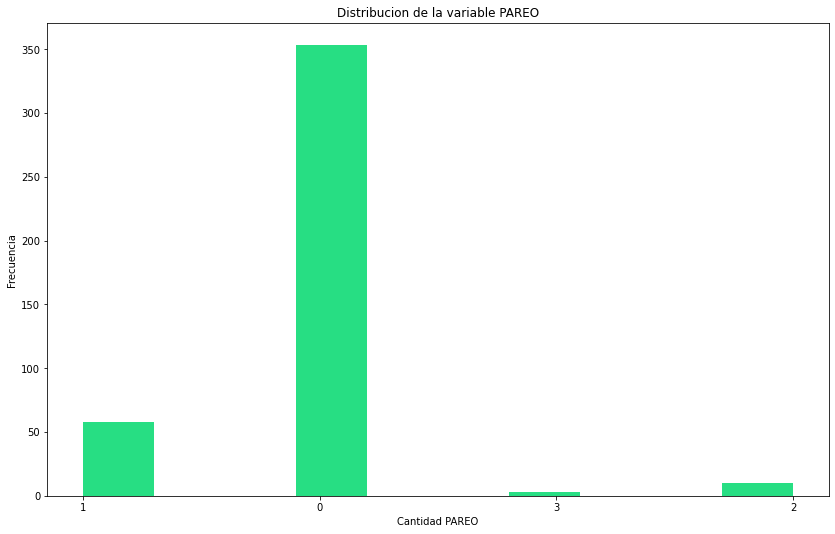

In [12]:
Histograma(PAREO,'Distribucion de la variable PAREO','Cantidad PAREO','Frecuencia')

En el siguente histograma se puede ver un sesgo positivo,  esto se explica de la misma forma que el histograma anterior, es decir, los datos se encuentran distribuidos hacia la izquierda del histograma de frecuencias.

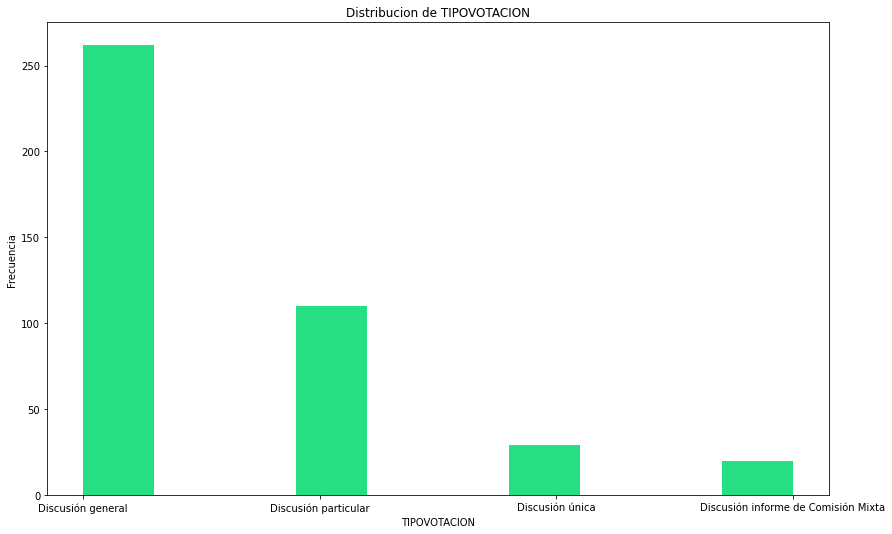

In [90]:
Histograma(TIPOVOTACION,'Distribucion de TIPOVOTACION','TIPOVOTACION','Frecuencia')

# 3.- Tratamiento de datos faltantes

En esta sección, utilizamos un bucle "for" para poder recorrer todas las columnas en busqueda de datos nulos (en este caso los campos del index DATA). De esta manera, logramos identificar de manera clara y practica en que "lugares" se manifiestan la mayor cantidad de nulos.

In [14]:
for feature in dfData.columns:
    print('Total de valores nulos de', feature, '=',dfData[feature].isna().sum())

Total de valores nulos de ('data', 'Latorre R., Juan Ignacio') = 41
Total de valores nulos de ('data', 'Coloma C., Juan Antonio') = 95
Total de valores nulos de ('data', 'García R., José') = 100
Total de valores nulos de ('data', 'Bianchi C., Carlos') = 130
Total de valores nulos de ('data', 'Navarro B., Alejandro') = 151
Total de valores nulos de ('data', 'Allende B., Isabel') = 150
Total de valores nulos de ('data', 'Lagos W., Ricardo') = 164
Total de valores nulos de ('data', 'García Huidobro S., Alejandro') = 100
Total de valores nulos de ('data', 'Guillier Á., Alejandro') = 123
Total de valores nulos de ('data', 'Durana S., José Miguel') = 39
Total de valores nulos de ('data', 'Prohens E., Rafael') = 97
Total de valores nulos de ('data', 'Pugh O., Kenneth') = 73
Total de valores nulos de ('data', 'Elizalde S., Alvaro') = 44
Total de valores nulos de ('data', 'Galilea V., Rodrigo') = 91
Total de valores nulos de ('data', 'Huenchumilla J., Francisco') = 125
Total de valores nulos de

A continuación, utilizamos el mismo bucle "for" para poder recorrer todas las columnas en busqueda de datos nulos (en este caso los campos del index METADATA). De esta manera, logramos identificar de manera clara y practica en que "lugares" se manifiestan la mayor cantidad de nulos.

In [15]:
for feature in dfMetadata.columns:
    print('Total de valores nulos de', feature, '=',dfMetadata[feature].isna().sum())

Total de valores nulos de ('metadata', 'ABSTENCION') = 0
Total de valores nulos de ('metadata', 'ETAPA') = 0
Total de valores nulos de ('metadata', 'FECHA') = 0
Total de valores nulos de ('metadata', 'NO') = 0
Total de valores nulos de ('metadata', 'PAREO') = 0
Total de valores nulos de ('metadata', 'QUORUM') = 11
Total de valores nulos de ('metadata', 'SESION') = 0
Total de valores nulos de ('metadata', 'SI') = 0
Total de valores nulos de ('metadata', 'TEMA') = 1
Total de valores nulos de ('metadata', 'TIPOVOTACION') = 3


Es una **incongruencia** que no haya un tema de votación establecido y que esten registrados votos a favor del mismo. Por otro lado, bajo una investigación de la información se encontró el tema que se llevó a cabo en esa sesión. A continuación, se cita la fuente: https://www.camara.cl/legislacion/ProyectosDeLey/tramitacion.aspx?prmID=13050&prmBOLETIN=12519-02

In [16]:
dfMetadata[118:119]

metadata                                                     \
    ABSTENCION                          ETAPA      FECHA NO PAREO   
118          0  Primer trámite constitucional 2019-04-02  0     0   

                                                            
             QUORUM SESION  SI  TEMA          TIPOVOTACION  
118  Mayoría simple  5/367  12  None  Discusión particular

### Trabajando con la variable tema

Como se puede apreciar en el resultado del filtrado en particular que utilizamos como prueba de que existian "None" en la columna tema. Entonces, el tema fue modificado en base a la información que encontramos sobre el tema que se había tratado esa fecha en particular.

In [17]:
dfMetadata.iloc[118:119,8:9]='Modifica el Código de Justicia Militar, para excluir de la jurisdicción militar el conocimiento de las causas por delitos comunes cometidos por militares, y entregarlo a la justicia ordinaria'
dfMetadata.iloc[118:119]

metadata                                                     \
    ABSTENCION                          ETAPA      FECHA NO PAREO   
118          0  Primer trámite constitucional 2019-04-02  0     0   

                                \
             QUORUM SESION  SI   
118  Mayoría simple  5/367  12   

                                                                              
                                                  TEMA          TIPOVOTACION  
118  Modifica el Código de Justicia Militar, para e...  Discusión particular

### Trabajando con la variable Quorum

Las siguientes sesiones muestran QUORUM como 'None', lo cual podría entorpecer la vista de los datos. Como grupo hicimos una investigación y efectivamente en aquellas sesiones en las cuales hay 'None', no se requirió de un quorum específico para aprobar el proyecto. En adición a esto, todos los temas a discutir en aquellas sesiones eran en relación al COVID-19, por lo que estimamos como grupo que tiene sentido que no se pidiera un QUORUM en esas sesiones.


In [18]:
 # Identificamos las filas Quorum con valor None
dfMetadata[(dfMetadata['metadata','QUORUM']!='Mayoría simple') &
           (dfMetadata['metadata','QUORUM']!='Cuatro séptimos Q.C.') & 
           (dfMetadata['metadata','QUORUM']!='Q.C.')&
           (dfMetadata['metadata','QUORUM']!='Tres quintos Q.C.')&
           (dfMetadata['metadata','QUORUM']!='Dos tercios Q.C.')]

metadata                                                              \
    ABSTENCION                           ETAPA      FECHA  NO PAREO QUORUM   
1            0   Primer trámite constitucional 2020-06-02   1     0   None   
73           0  Segundo trámite constitucional 2020-07-07   0     0   None   
172          0  Segundo trámite constitucional 2020-06-16   0     0   None   
175          0  Segundo trámite constitucional 2020-07-08   0     0   None   
188          0   Primer trámite constitucional 2020-09-01   0     0   None   
190          0   Tercer trámite constitucional 2020-05-20  39     0   None   
279          0   Primer trámite constitucional 2020-06-24   0     0   None   
284          0   Tercer trámite constitucional 2020-06-08   0     0   None   
364          2  Segundo trámite constitucional 2020-05-20   0     0   None   
415          0  Segundo trámite constitucional 2020-07-21   0     1   None   
420          4   Primer trámite constitucional 2020-09-01   0     0   None   

                                                                    \
     SESION  SI                                               TEMA   
1    31/368  37  Aprobación en particular del proyecto de ley q...   
73   47/368  37  Aprobación en general del proyecto de ley que ...   
172  39/368  33  Aprobación en particular del proyecto de ley, ...   
175  48/368  33  Aprobación de la Convención Multilateral para ...   
188  79/368  39  Aprobación en general del proyecto de ley, en ...   
190  25/368   0  Proyecto de reforma constitucional, en tercer ...   
279  44/368  39  Aprobación en general y en particular del proy...   
284  34/368  39  Aprobación de las enmiendas propuestas por la ...   
364  24/368  38  Proyecto de ley, en segundo trámite constituci...   
415  51/368  38  Aprobación en particular del proyecto de ley, ...   
420  79/368  33  Proyecto de ley, iniciado en Moción de los Hon...   

                           
             TIPOVOTACION  
1       Discusión general  
73      Discusión general  
172  Discusión particular  
175     Discusión general  
188     Discusión general  
190       Discusión única  
279     Discusión general  
284       Discusión única  
364  Discusión particular  
415  Discusión particular  
420     Discusión general

En conclusión a esto, cambiamos los datos de 'None' a 'No requerido', para que se pueda entender de mejor manera a simple vista el significado de estos datos, ya que antes de intervenirla, pareciera que estuvieran nulos, y no es así.

In [19]:
dfMetadata['metadata','QUORUM'] = dfMetadata['metadata','QUORUM'].fillna('No requerido')
dfMetadata['metadata','QUORUM']

0            Mayoría simple
1              No requerido
2      Cuatro séptimos Q.C.
3            Mayoría simple
4      Cuatro séptimos Q.C.
               ...         
420            No requerido
421          Mayoría simple
422          Mayoría simple
423          Mayoría simple
424          Mayoría simple
Name: (metadata, QUORUM), Length: 424, dtype: object

### Trabajando con la variable Tipovotacion

In [20]:
# Identificamos las filas de TIPOVOTACION con valor None
dfMetadata[(dfMetadata['metadata','TIPOVOTACION']!='Discusión general') &
          (dfMetadata['metadata','TIPOVOTACION']!='Discusión única')&
          (dfMetadata['metadata','TIPOVOTACION']!='Discusión particular')&
          (dfMetadata['metadata','TIPOVOTACION']!='Discusión informe de Comisión Mixta')]

metadata                                                       \
    ABSTENCION                           ETAPA      FECHA  NO PAREO   
51           2  Segundo trámite constitucional 2020-11-23  16     0   
145          0   Primer trámite constitucional 2018-09-04  20     0   
153          0   Primer trámite constitucional 2019-04-02  10     0   

                                  \
             QUORUM   SESION  SI   
51   Mayoría simple  115/368   6   
145  Mayoría simple   47/366  18   
153  Mayoría simple    5/367  20   

                                                                     
                                                  TEMA TIPOVOTACION  
51   Votación sobre la admisibilidad de la indicaci...         None  
145  La Sala rechaza el cambio de tramitación del p...         None  
153  Proyecto de ley que modifica el Código Procesa...         None

Tomamos la desición de eliminar las 3 filas con datos faltantes que se encontraban en la columna "TIPOVOTACION", porque bajo una ardua busqueda de información sobre estas filas, no se encontró información para reemplazar los datos faltantes. Por ende, decidimos que eliminar sería la mejor opción al ser pocos datos faltantes como para tener un gran impacto en nuestra toma de desiciones.

In [21]:
dfMetadata=dfMetadata.dropna(axis=0,how="any")

### Trabajando con el dfData 

En el caso de los datos nulos que se presentaron en los parlamentarios, los reemplazamos por 'Ausencia', ya que nos pareció la conclusión más lógica del porqué el parlamentario contiene datos nulos en ese campo. En añadido a esto, este nuevo dato no intefiere con el tema que se busca abordar.

In [22]:
dfData = dfData.fillna('Ausencia')
dfData

data                                          \
    Latorre R., Juan Ignacio Coloma C., Juan Antonio García R., José   
0                         Si                      Si              Si   
1                         No                Ausencia              Si   
2                         Si                      Si              Si   
3                         Si                      Si              Si   
4                         Si                      Si              Si   
..                       ...                     ...             ...   
420                       Si                      Si              Si   
421                       Si                      Si              Si   
422                       No                      Si              Si   
423               Abstencion                      Si              Si   
424                       Si                Ausencia              Si   

                                                                 \
    Bianchi C., Carlos Navarro B., Alejandro Allende B., Isabel   
0                   Si                    Si                 Si   
1                   Si                    Si                 Si   
2                   Si              Ausencia                 Si   
3                   Si                    Si           Ausencia   
4                   Si                    Si                 Si   
..                 ...                   ...                ...   
420                 Si                    Si                 Si   
421         Abstencion                    Si                 Si   
422         Abstencion              Ausencia                 No   
423                 No                    No                 Si   
424           Ausencia              Ausencia                 Si   

                                                                            \
    Lagos W., Ricardo García Huidobro S., Alejandro Guillier Á., Alejandro   
0                  Si                            Si                  Pareo   
1            Ausencia                      Ausencia                     Si   
2                  Si                            Si                     Si   
3            Ausencia                            Si                     Si   
4                  Si                            Si                     Si   
..                ...                           ...                    ...   
420                Si                            Si                     Si   
421                Si                            Si                     Si   
422                No                      Ausencia                     No   
423                Si                            Si                     Si   
424          Ausencia                            Si               Ausencia   

                            ...                                     \
    Durana S., José Miguel  ... Soria Q., Jorge Provoste C., Yasna   
0                       Si  ...        Ausencia           Ausencia   
1                       Si  ...              Si                 Si   
2                 Ausencia  ...              Si           Ausencia   
3                       Si  ...              Si                 Si   
4                       Si  ...              Si                 Si   
..                     ...  ...             ...                ...   
420                     Si  ...              Si                 Si   
421                     Si  ...              Si         Abstencion   
422                     Si  ...        Ausencia         Abstencion   
423                     Si  ...              Si                 Si   
424                     No  ...              Si                 Si   

                                                               \
    Castro P., Juan Aravena A., Carmen Gloria Kast S., Felipe   
0          Ausencia                  Ausencia        Ausencia   
1                Si                        Si              Si   
2          Ausencia          

## Confirmamos que no quden nulos en los dataframes

Confirmamos que no hubieran nulos primero en la Data, y luego en la MetaData recorriendo cada una de estas con un for en busca de nulos.

In [23]:
for feature in dfData.columns:
    print('Total de valores nulos de', feature, '=',dfData[feature].isna().sum())

Total de valores nulos de ('data', 'Latorre R., Juan Ignacio') = 0
Total de valores nulos de ('data', 'Coloma C., Juan Antonio') = 0
Total de valores nulos de ('data', 'García R., José') = 0
Total de valores nulos de ('data', 'Bianchi C., Carlos') = 0
Total de valores nulos de ('data', 'Navarro B., Alejandro') = 0
Total de valores nulos de ('data', 'Allende B., Isabel') = 0
Total de valores nulos de ('data', 'Lagos W., Ricardo') = 0
Total de valores nulos de ('data', 'García Huidobro S., Alejandro') = 0
Total de valores nulos de ('data', 'Guillier Á., Alejandro') = 0
Total de valores nulos de ('data', 'Durana S., José Miguel') = 0
Total de valores nulos de ('data', 'Prohens E., Rafael') = 0
Total de valores nulos de ('data', 'Pugh O., Kenneth') = 0
Total de valores nulos de ('data', 'Elizalde S., Alvaro') = 0
Total de valores nulos de ('data', 'Galilea V., Rodrigo') = 0
Total de valores nulos de ('data', 'Huenchumilla J., Francisco') = 0
Total de valores nulos de ('data', 'Sandoval P.,

In [24]:
for feature in dfMetadata.columns:
    print('Total de valores nulos de', feature, '=',dfMetadata[feature].isna().sum())

Total de valores nulos de ('metadata', 'ABSTENCION') = 0
Total de valores nulos de ('metadata', 'ETAPA') = 0
Total de valores nulos de ('metadata', 'FECHA') = 0
Total de valores nulos de ('metadata', 'NO') = 0
Total de valores nulos de ('metadata', 'PAREO') = 0
Total de valores nulos de ('metadata', 'QUORUM') = 0
Total de valores nulos de ('metadata', 'SESION') = 0
Total de valores nulos de ('metadata', 'SI') = 0
Total de valores nulos de ('metadata', 'TEMA') = 0
Total de valores nulos de ('metadata', 'TIPOVOTACION') = 0


# 4.- TRABAJANDO ESTADO DE SESIÓN
 * Si esta aprobada o no una materia
 Utilizamos una metodología de división de cada tipo de quorum, tomando cada quorum y dividiendolos en sub-dataframes, pudiendo así trabajarlos de manera localizada uno por uno para luego al final juntarlos en un dataframe. Esto se realiza para crear la columna de **'ESTADO'**, que es la que nos reflejará si el tema a votar en cada sesión fue aprobado o rechazado por los parlamentarios.
 
 #### Más abajo se ve que realizamos esta división por cada uno de los QUORUM

### QUORUM: Mayoría simple

In [25]:
#Agrupo por Quorum "Mayoría simple"
dfMayoria  = dfMetadata[dfMetadata['metadata','QUORUM'] == 'Mayoría simple']
#Transformo de  object a int
dfSI       = dfMayoria['metadata','SI'].astype(int)
dfNO       = dfMayoria['metadata','NO'].astype(int)
Abstencion = dfMayoria['metadata','ABSTENCION'].astype(int) 
total = dfSI + dfNO + Abstencion
#Condición                         
dfMayoria['metadata','ESTADO'] = np.where(dfSI >= (total/2)+1,'Aprobada','Rechazada')
# Pruebo y comparo resultados
dfMayoria.tail(10)

metadata                                                                \
    ABSTENCION                                              ETAPA      FECHA   
410          0                     Segundo trámite constitucional 2018-10-03   
411          4                     Segundo trámite constitucional 2019-03-06   
412          1                     Segundo trámite constitucional 2019-03-06   
413          0  Disc. informe C.Mixta por rechazo de modif. C.... 2019-03-20   
417          0                      Primer trámite constitucional 2018-10-23   
418          0                      Primer trámite constitucional 2018-10-23   
421          3                     Segundo trámite constitucional 2020-09-08   
422          4                     Segundo trámite constitucional 2019-04-10   
423          1                     Segundo trámite constitucional 2019-06-11   
424          1                     Segundo trámite constitucional 2019-06-11   

                                           \
     NO PAREO          QUORUM  SESION  SI   
410   0     1  Mayoría simple  56/366  37   
411  17     0  Mayoría simple  95/366   6   
412  24     0  Mayoría simple  95/366   6   
413   0     1  Mayoría simple   4/367  31   
417  19     1  Mayoría simple  62/366  16   
418   5     1  Mayoría simple  62/366  16   
421   0     0  Mayoría simple  84/368  35   
422   7     0  Mayoría simple   9/367  25   
423   4     0  Mayoría simple  24/367  33   
424   2     0  Mayoría simple  24/367  24   

                                                        \
                                                  TEMA   
410  Proyecto de ley, en segundo trámite constituci...   
411  Proyecto de ley, en segundo trámite constituci...   
412  Proyecto de ley, en segundo trámite constituci...   
413  Informe de la Comisión Mixta encargada de prop...   
417  Proyecto de ley, en primer trámite constitucio...   
418  Proyecto de ley, en primer trámite constitucio...   
421  Aprobación, en general y particular, del proye...   
422  Proyecto de ley, en segundo trámite constituci...   
423  Proyecto de ley, en segundo trámite constituci...   
424  Enmienda de la Comisión de Trabajo y Previsión...   

                                                     
                            TIPOVOTACION     ESTADO  
410                    Discusión general   Aprobada  
411                 Discusión particular  Rechazada  
412                 Discusión particular  Rechazada  
413  Discusión informe de Comisión Mixta   Aprobada  
417                 Discusión particular  Rechazada  
418                 Discusión particular   Aprobada  
421                    Discusión general   Aprobada  
422                    Discusión general   Aprobada  
423                 Discusión particular   Aprobada  
424                 Discusión particular   Aprobada

## Histograma de frecuencias de  ESTADO de quorum "Mayoría simple"
 **Se puede ver que la gran mayoria de las materias fueron aprobadas bajo el Quorum "Mayoría simple"**

<AxesSubplot:>

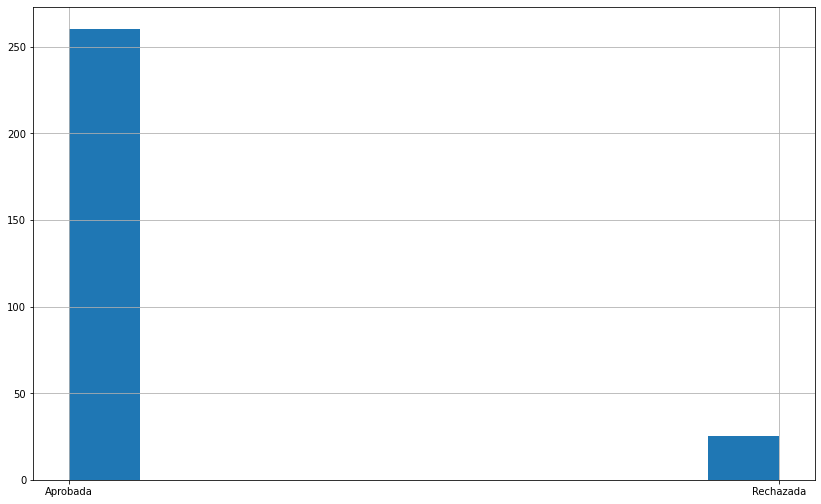

In [27]:
dfMayoria['metadata','ESTADO'].hist()

### QUORUM: Cuatro séptimos Q.C.

In [26]:
# Agrupo por Quorum ('Cuatro séptimos Q.C.')
dfCuatroSept = dfMetadata[dfMetadata['metadata','QUORUM'] == 'Cuatro séptimos Q.C.']
# Definición de las variables
CuatroSepSI  = dfCuatroSept['metadata','SI'].astype(int)
CuatroSepNO  = dfCuatroSept['metadata','NO'].astype(int)
Abstencion   = dfCuatroSept['metadata','ABSTENCION'].astype(int)
totalParlamento = 45
porcentaje = round((totalParlamento/7)*4)
# Condición
dfCuatroSept['metadata','ESTADO'] = np.where(CuatroSepSI >= porcentaje,'Aprobada','Rechazada')
dfCuatroSept['metadata']


,ABSTENCION,ETAPA,FECHA,NO,PAREO,QUORUM,SESION,SI,TEMA,TIPOVOTACION,ESTADO
2,1,Primer trámite constitucional,2019-12-30,0,1,Cuatro séptimos Q.C.,89/367,27,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Aprobada
4,0,Primer trámite constitucional,2020-01-29,0,0,Cuatro séptimos Q.C.,103/367,35,"Proyecto de ley, en primer trámite constitucio...",Discusión particular,Aprobada
5,0,Tercer trámite constitucional,2020-07-29,0,0,Cuatro séptimos Q.C.,57/368,36,Aprobación del informe de la Comisión de Salud...,Discusión única,Aprobada
7,0,Segundo trámite constitucional,2020-11-03,0,0,Cuatro séptimos Q.C.,108/368,35,"Aprobación en general del proyecto de ley, en ...",Discusión general,Aprobada
21,1,Primer trámite constitucional,2019-01-09,0,0,Cuatro séptimos Q.C.,87/366,37,"Proyecto de ley, en primer trámite constitucio...",Discusión general,Aprobada
...,...,...,...,...,...,...,...,...,...,...,...
390,0,Segundo trámite constitucional,2018-07-31,0,0,Cuatro séptimos Q.C.,35/366,36,"Proyecto de ley, en segundo trámite constituci...",Discusión general,Aprobada
393,1,Segundo trámite constitucional,2020-03-25,0,0,Cuatro séptimos Q.C.,6/368,29,"Aprobación, en general y en particular, con mo...",Discusión general,Aprobada
414,0,Segundo trámite constitucional,2019-07-23,0,1,Cuatro séptimos Q.C.,35/367,39,"Proyecto de ley, en segundo trámite constituci...",Discusión general,Aprobada
416,0,Primer trámite constitucional,2018-10-23,0,1,Cuatro séptimos Q.C.,62/366,26,"Proyecto de ley, en primer trámite constitucio...",Discusión particular,Aprobada


### Histograma de frecuencias de estado 4/7
 **Se puede ver que la cantidad de materias aprobadas es mayor que la cantidad de rechazadas bajo el Quorum Cuatro séptimos Q.C.**

<AxesSubplot:>

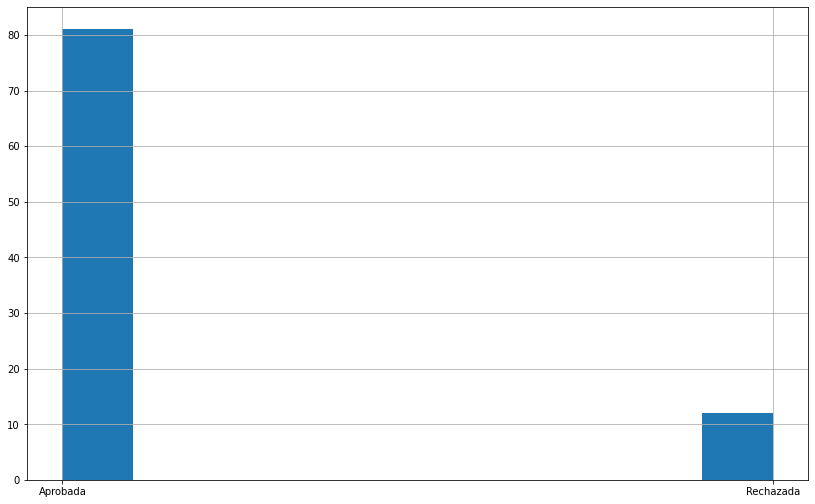

In [27]:
dfCuatroSept['metadata','ESTADO'].hist()

### QUORUM: Tres quintos Q.C.

In [28]:
# Agrupo por Quorum: "Tres quintos Q.C."
dfTresQuint = dfMetadata[dfMetadata['metadata','QUORUM'] == 'Tres quintos Q.C.']
# Definicion de variables
TresQSI = dfTresQuint['metadata','SI'].astype(int)

totalParlamento = 45
Porcentaje = round((totalParlamento/5)*3)

# Condición
dfTresQuint['metadata','ESTADO'] = np.where(TresQSI >= Porcentaje,'Aprobada','Rechazada')
dfTresQuint

metadata                                                       \
    ABSTENCION                           ETAPA      FECHA  NO PAREO   
48           1  Segundo trámite constitucional 2019-05-07   0     0   
137          4   Primer trámite constitucional 2019-11-27  20     0   
189          0   Primer trámite constitucional 2020-05-13   0     0   
192          0   Primer trámite constitucional 2020-08-13   0     0   
193          1   Primer trámite constitucional 2020-08-13   0     0   
223          0   Primer trámite constitucional 2020-03-18   0     0   
254          0   Primer trámite constitucional 2020-03-23   1     0   
256          0  Segundo trámite constitucional 2019-11-13   4     0   
370          0   Primer trámite constitucional 2018-05-08   0     0   

                                    \
                QUORUM  SESION  SI   
48   Tres quintos Q.C.  14/367  37   
137  Tres quintos Q.C.  76/367  12   
189  Tres quintos Q.C.  23/368  37   
192  Tres quintos Q.C.  67/368  39   
193  Tres quintos Q.C.  67/368  35   
223  Tres quintos Q.C.   3/368  33   
254  Tres quintos Q.C.   4/368  30   
256  Tres quintos Q.C.  68/367  36   
370  Tres quintos Q.C.  13/366  36   

                                                                           \
                                                  TEMA       TIPOVOTACION   
48   Proyecto de reforma constitucional, en segundo...  Discusión general   
137  Proyecto de reforma constitucional, en primer ...  Discusión general   
189  Aprobación, en general y en particular, del pr...  Discusión general   
192  Aprobación en general del proyecto de reforma ...  Discusión general   
193  Aprobación en particular del proyecto de refor...  Discusión general   
223  Aprobación en general y en particular del proy...  Discusión general   
254  Proyectos de reforma constitucional, en primer...  Discusión general   
256  Proyecto de reforma constitucional, en segundo...  Discusión general   
370  Proyecto de ley, en primer trámite constitucio...  Discusión general   

                
        ESTADO  
48    Aprobada  
137  Rechazada  
189   Aprobada  
192   Aprobada  
193   Aprobada  
223   Aprobada  
254   Aprobada  
256   Aprobada  
370   Aprobada

### Histograma de frecuencias ESTADO 

<AxesSubplot:>

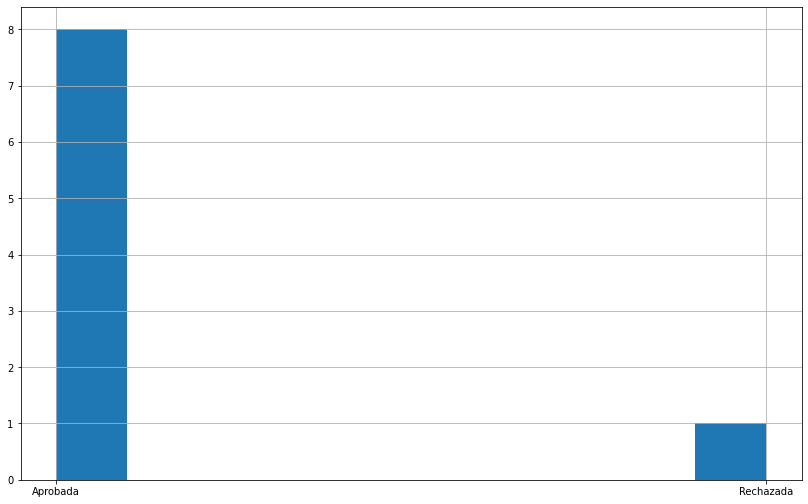

In [29]:
dfTresQuint['metadata','ESTADO'].hist()

### QUORUM: Dos tercios Q.C.

In [30]:
# Agrupo por Quorum: "Tres quintos Q.C."
dfDosTerc = dfMetadata[dfMetadata['metadata','QUORUM'] == 'Tres quintos Q.C.']
# Definicion de variables
DosTercSI = dfDosTerc['metadata','SI'].astype(int)

totalParlamento = 45
porcentaje = round((totalParlamento/3)*2)
# Condición
dfDosTerc['metadata','ESTADO'] = np.where(DosTercSI >= Porcentaje,'Aprobada','Rechazada')
dfDosTerc

metadata                                                       \
    ABSTENCION                           ETAPA      FECHA  NO PAREO   
48           1  Segundo trámite constitucional 2019-05-07   0     0   
137          4   Primer trámite constitucional 2019-11-27  20     0   
189          0   Primer trámite constitucional 2020-05-13   0     0   
192          0   Primer trámite constitucional 2020-08-13   0     0   
193          1   Primer trámite constitucional 2020-08-13   0     0   
223          0   Primer trámite constitucional 2020-03-18   0     0   
254          0   Primer trámite constitucional 2020-03-23   1     0   
256          0  Segundo trámite constitucional 2019-11-13   4     0   
370          0   Primer trámite constitucional 2018-05-08   0     0   

                                    \
                QUORUM  SESION  SI   
48   Tres quintos Q.C.  14/367  37   
137  Tres quintos Q.C.  76/367  12   
189  Tres quintos Q.C.  23/368  37   
192  Tres quintos Q.C.  67/368  39   
193  Tres quintos Q.C.  67/368  35   
223  Tres quintos Q.C.   3/368  33   
254  Tres quintos Q.C.   4/368  30   
256  Tres quintos Q.C.  68/367  36   
370  Tres quintos Q.C.  13/366  36   

                                                                           \
                                                  TEMA       TIPOVOTACION   
48   Proyecto de reforma constitucional, en segundo...  Discusión general   
137  Proyecto de reforma constitucional, en primer ...  Discusión general   
189  Aprobación, en general y en particular, del pr...  Discusión general   
192  Aprobación en general del proyecto de reforma ...  Discusión general   
193  Aprobación en particular del proyecto de refor...  Discusión general   
223  Aprobación en general y en particular del proy...  Discusión general   
254  Proyectos de reforma constitucional, en primer...  Discusión general   
256  Proyecto de reforma constitucional, en segundo...  Discusión general   
370  Proyecto de ley, en primer trámite constitucio...  Discusión general   

                
        ESTADO  
48    Aprobada  
137  Rechazada  
189   Aprobada  
192   Aprobada  
193   Aprobada  
223   Aprobada  
254   Aprobada  
256   Aprobada  
370   Aprobada

### Histograma de frecuencia ESTADO

<AxesSubplot:>

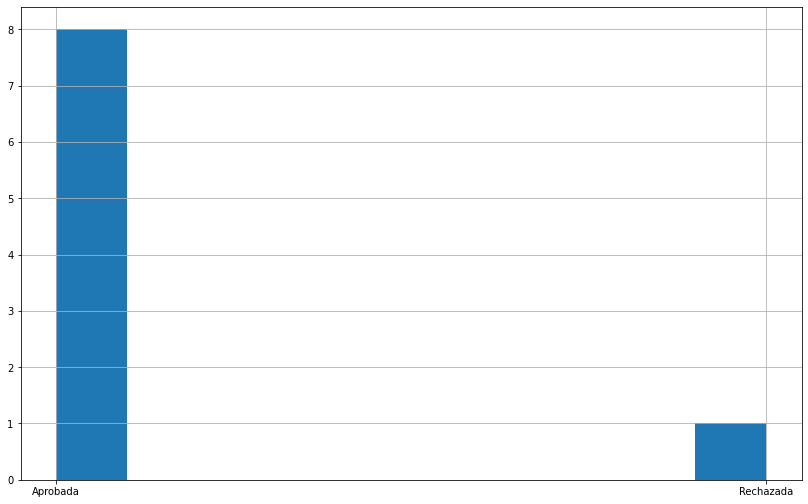

In [31]:
dfDosTerc['metadata','ESTADO'].hist()

### QUORUM: No requerido

In [32]:
# Agrupo por Quorum: "No requerido"
dfNoRequ   = dfMetadata[dfMetadata['metadata','QUORUM'] == 'No requerido']
# Definicion de variables
SI         = dfNoRequ['metadata','SI'].astype(int)
NO         = dfNoRequ['metadata','NO'].astype(int)

# Condición
dfNoRequ['metadata','ESTADO'] = np.where(SI > NO,'Aprobada','Rechazada')
dfNoRequ

metadata                                                       \
    ABSTENCION                           ETAPA      FECHA  NO PAREO   
1            0   Primer trámite constitucional 2020-06-02   1     0   
73           0  Segundo trámite constitucional 2020-07-07   0     0   
172          0  Segundo trámite constitucional 2020-06-16   0     0   
175          0  Segundo trámite constitucional 2020-07-08   0     0   
188          0   Primer trámite constitucional 2020-09-01   0     0   
190          0   Tercer trámite constitucional 2020-05-20  39     0   
279          0   Primer trámite constitucional 2020-06-24   0     0   
284          0   Tercer trámite constitucional 2020-06-08   0     0   
364          2  Segundo trámite constitucional 2020-05-20   0     0   
415          0  Segundo trámite constitucional 2020-07-21   0     1   
420          4   Primer trámite constitucional 2020-09-01   0     0   

                               \
           QUORUM  SESION  SI   
1    No requerido  31/368  37   
73   No requerido  47/368  37   
172  No requerido  39/368  33   
175  No requerido  48/368  33   
188  No requerido  79/368  39   
190  No requerido  25/368   0   
279  No requerido  44/368  39   
284  No requerido  34/368  39   
364  No requerido  24/368  38   
415  No requerido  51/368  38   
420  No requerido  79/368  33   

                                                                              \
                                                  TEMA          TIPOVOTACION   
1    Aprobación en particular del proyecto de ley q...     Discusión general   
73   Aprobación en general del proyecto de ley que ...     Discusión general   
172  Aprobación en particular del proyecto de ley, ...  Discusión particular   
175  Aprobación de la Convención Multilateral para ...     Discusión general   
188  Aprobación en general del proyecto de ley, en ...     Discusión general   
190  Proyecto de reforma constitucional, en tercer ...       Discusión única   
279  Aprobación en general y en particular del proy...     Discusión general   
284  Aprobación de las enmiendas propuestas por la ...       Discusión única   
364  Proyecto de ley, en segundo trámite constituci...  Discusión particular   
415  Aprobación en particular del proyecto de ley, ...  Discusión particular   
420  Proyecto de ley, iniciado en Moción de los Hon...     Discusión general   

                
        ESTADO  
1     Aprobada  
73    Aprobada  
172   Aprobada  
175   Aprobada  
188   Aprobada  
190  Rechazada  
279   Aprobada  
284   Aprobada  
364   Aprobada  
415   Aprobada  
420   Aprobada

### Histograma de Quorum no requerido
 **Se puede ver que las materias aprobadas son mayor a las rechazadas**

<AxesSubplot:>

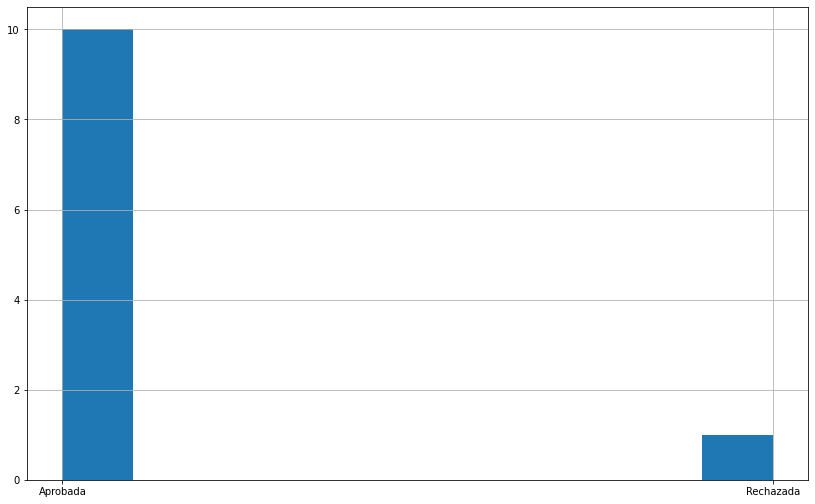

In [33]:
dfNoRequ['metadata','ESTADO'].hist()

### QUORUM: Q.C. 

In [34]:
#Agrupo por Quorum "Mayoría simple"
dfQC  = dfMetadata[dfMetadata['metadata','QUORUM'] == 'Q.C.']
#TransfodfQCrmo de  object a int
QcSI       = dfQC['metadata','SI'].astype(int)

totalParlamento = 45
porcentaje = round((totalParlamento/7)*4)


#Condición
dfQC['metadata','ESTADO'] = np.where(QcSI >= porcentaje,'Aprobada','Rechazada')
# Pruebo y comparo resultados
dfQC.tail(10)

metadata                                                              \
    ABSTENCION                           ETAPA      FECHA  NO PAREO QUORUM   
294          1  Segundo trámite constitucional 2020-03-10   0     0   Q.C.   
295          0  Segundo trámite constitucional 2020-03-10   5     0   Q.C.   
303          1  Segundo trámite constitucional 2020-03-25   0     0   Q.C.   
353          2   Primer trámite constitucional 2020-03-26   0     0   Q.C.   
354          0   Primer trámite constitucional 2020-03-26   5     0   Q.C.   
355          1   Tercer trámite constitucional 2020-03-30  33     0   Q.C.   
357          0   Primer trámite constitucional 2019-10-22   0     0   Q.C.   
385          3  Segundo trámite constitucional 2018-10-02  13     0   Q.C.   
391          2  Segundo trámite constitucional 2019-03-13  21     0   Q.C.   
392          1  Segundo trámite constitucional 2019-03-13   0     0   Q.C.   

                                                                     \
      SESION  SI                                               TEMA   
294  108/367  32     En votación artículos 2, 3 y 4, en particular.   
295  108/367  26  Votación separada del inciso segundo del artíc...   
303    6/368  31  Aprobación en general del proyecto de ley que ...   
353    7/368  28  Aprobación en general y en particular del proy...   
354    7/368  23  Aprobación del artículo 6° del  proyecto de le...   
355    9/368   4  Rechazo de las enmiendas propuestas por la Cám...   
357   60/367  24  Proyecto de ley, en primer trámite constitucio...   
385   55/366  24  Proyecto de ley, en segundo trámite constituci...   
391    2/367  13  Proyecto de ley, en segundo trámite constituci...   
392    2/367  28  Proyecto de ley, en segundo trámite constituci...   

                                      
             TIPOVOTACION     ESTADO  
294     Discusión general   Aprobada  
295     Discusión general   Aprobada  
303     Discusión general   Aprobada  
353     Discusión general   Aprobada  
354     Discusión general  Rechazada  
355       Discusión única  Rechazada  
357  Discusión particular  Rechazada  
385     Discusión general  Rechazada  
391  Discusión particular  Rechazada  
392  Discusión particular   Aprobada

### Histograma de frecuencias de estado Quorum: Q.C.
**Se puede ver que las materias aprobadas son mayor que las rechazadas**

<AxesSubplot:>

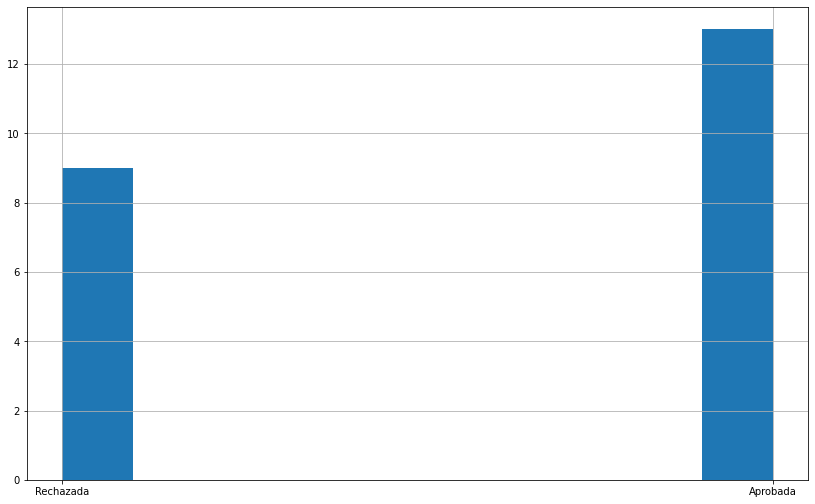

In [35]:
dfQC['metadata','ESTADO'].hist()

## Se vuelven a unir los dataframe agrupados por  Quorum en un solo dataframe

In [36]:
dfMetaUnido = pd.concat([dfMayoria,dfCuatroSept,dfDosTerc,dfNoRequ,dfTresQuint,dfQC],axis=0)

dfMetaUnido

metadata                                                       \
    ABSTENCION                           ETAPA      FECHA  NO PAREO   
0            0   Primer trámite constitucional 2018-12-12   0     1   
3            0   Primer trámite constitucional 2019-03-05   0     0   
6            0  Segundo trámite constitucional 2020-08-19   0     0   
8            0   Primer trámite constitucional 2019-03-19   0     1   
9            0   Primer trámite constitucional 2019-04-17   0     3   
..         ...                             ...        ...  ..   ...   
355          1   Tercer trámite constitucional 2020-03-30  33     0   
357          0   Primer trámite constitucional 2019-10-22   0     0   
385          3  Segundo trámite constitucional 2018-10-02  13     0   
391          2  Segundo trámite constitucional 2019-03-13  21     0   
392          1  Segundo trámite constitucional 2019-03-13   0     0   

                                 \
             QUORUM  SESION  SI   
0    Mayoría simple  77/366  15   
3    Mayoría simple  94/366  39   
6    Mayoría simple  70/368  39   
8    Mayoría simple   3/367  35   
9    Mayoría simple  11/367  24   
..              ...     ...  ..   
355            Q.C.   9/368   4   
357            Q.C.  60/367  24   
385            Q.C.  55/366  24   
391            Q.C.   2/367  13   
392            Q.C.   2/367  28   

                                                                              \
                                                  TEMA          TIPOVOTACION   
0    Proyecto de ley, en primer trámite constitucio...     Discusión general   
3    Proyecto de ley, en primer trámite constitucio...     Discusión general   
6    Aprobación en general y en particular del proy...     Discusión general   
8    Proyecto de ley, en primer trámite constitucio...     Discusión general   
9    Proyecto de ley, en primer trámite constitucio...     Discusión general   
..                                                 ...                   ...   
355  Rechazo de las enmiendas propuestas por la Cám...       Discusión única   
357  Proyecto de ley, en primer trámite constitucio...  Discusión particular   
385  Proyecto de ley, en segundo trámite constituci...     Discusión general   
391  Proyecto de ley, en segundo trámite constituci...  Discusión particular   
392  Proyecto de ley, en segundo trámite constituci...  Discusión particular   

                
        ESTADO  
0     Aprobada  
3     Aprobada  
6     Aprobada  
8     Aprobada  
9     Aprobada  
..         ...  
355  Rechazada  
357  Rechazada  
385  Rechazada  
391  Rechazada  
392   Aprobada  

[429 rows x 11 columns]

In [37]:
dfMetaUnido['metadata','ETAPA'].unique()

array(['Primer trámite constitucional', 'Segundo trámite constitucional',
       'Tercer trámite constitucional',
       'Disc. informe C.Mixta por rechazo de modific. en C. Origen',
       'Disc. informe C.Mixta por rechazo de modif. C. Revisora',
       'Disc. Informe C.Mixta por rechazo idea de legislar C. Revis.',
       'Disc. informe C.Mixta por rechazo idea de legislar C. Origen'],
      dtype=object)

Cambiamos los valores de 'ETAPA' por valores numéricos asignándoles un numero especifico a cada uno de ellos.

In [38]:
dfMetaUnido['metadata','ETAPA'].replace({'Primer trámite constitucional':1, 'Segundo trámite constitucional':2,
       'Tercer trámite constitucional':3,
       'Disc. informe C.Mixta por rechazo de modific. en C. Origen':4,
       'Disc. informe C.Mixta por rechazo de modif. C. Revisora':5,
       'Disc. Informe C.Mixta por rechazo idea de legislar C. Revis.':6,
       'Disc. informe C.Mixta por rechazo idea de legislar C. Origen':7},inplace = True)

#### Ahora que están todas las filas juntas, ¿Cuantas materias aprobadas y rechazadas hay?

Se crea una variable dummy con el fin de separar los aprobados de los rechazados y así  poder sumar por separados,
para ello se definen:
   * Total_Aprobadas: Que corresponde a la suma total de todas las materias Aprobadas.
   * Total_Rechazadas: Que corresponde a la suma total de todas las materias Rechazadas.

In [39]:
dummy_Estado = pd.get_dummies(dfMetaUnido['metadata','ESTADO'],prefix= 'ESTADO')

In [41]:
Total_Aprobadas  = dummy_Estado['ESTADO_Aprobada'].sum()
Total_Rechazadas = dummy_Estado['ESTADO_Rechazada'].sum()

In [42]:
print('Total',Total_Aprobadas+Total_Rechazadas)
print('Aprobadas:',Total_Aprobadas)
print('Rechazadas:',Total_Rechazadas)

Total 429
Aprobadas: 380
Rechazadas: 49


Con un total de 429 sesiones, 396 fueron aprobadas y tan solo 33 fueron rechazadas.

#### ¿Como se veria graficamente?

Se hace un grafico de tortas, con el fin de mostrar graficamente la diferencias que existen entre las materias aprobadas y las rechazadas.

Se puede ver que las aprobadas contemplan un 92.3% del total en contra de un 7.7% de las rechazadas.

Esto nos hace pensar que por lo general cada materia que entra en sesión es aprobada

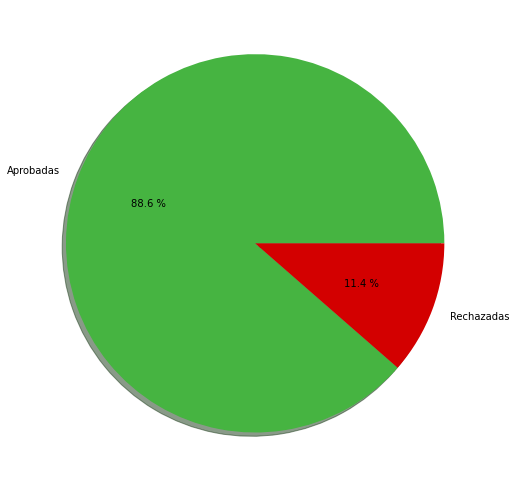

In [43]:
Totales = [Total_Aprobadas,Total_Rechazadas]
Tipo = ['Aprobadas','Rechazadas']
colores = ["#46B441","#D30000"]
plt.pie(Totales,labels=Tipo,autopct="%0.1f %%",colors=colores,shadow=True)
plt.show()

Creamos la variable 'dfFinal', pasandole todos los datos que tenemos hasta el momento. Esto con el propósito de manejar de una mejor manera los datos para la futura regresión logística y el árbol de decisión.

In [44]:
dfFinal = dfMetaUnido 

#### Transformo Aprobada en 1 y Rechazada en 0

In [45]:
dfFinal['metadata','ESTADO'] = (dfFinal['metadata','ESTADO']=='Aprobada').astype(int)
dfFinal['metadata','ESTADO']

0      1
3      1
6      1
8      1
9      1
      ..
355    0
357    0
385    0
391    0
392    1
Name: (metadata, ESTADO), Length: 429, dtype: int32

Transformamos los quorums y tipos de votación en 1 y 0 para después entrenar los datos.

In [46]:
dummy_Quorum = pd.get_dummies(dfFinal['metadata','QUORUM'],prefix= 'QUORUM')
dummy_Tipo = pd.get_dummies(dfFinal['metadata','TIPOVOTACION'],prefix= 'TIPO_V')
# Concatenamos los resultados al DataFrame final
dfFinal = pd.concat([dfFinal,dummy_Quorum],axis=1)
dfFinal = pd.concat([dfFinal,dummy_Tipo],axis=1)

## Confirmamos la creacion de columnas para el modelo

In [47]:
dfFinal.columns.values.tolist()

[('metadata', 'ABSTENCION'),
 ('metadata', 'ETAPA'),
 ('metadata', 'FECHA'),
 ('metadata', 'NO'),
 ('metadata', 'PAREO'),
 ('metadata', 'QUORUM'),
 ('metadata', 'SESION'),
 ('metadata', 'SI'),
 ('metadata', 'TEMA'),
 ('metadata', 'TIPOVOTACION'),
 ('metadata', 'ESTADO'),
 'QUORUM_Cuatro séptimos Q.C.',
 'QUORUM_Mayoría simple',
 'QUORUM_No requerido',
 'QUORUM_Q.C.',
 'QUORUM_Tres quintos Q.C.',
 'TIPO_V_Discusión general',
 'TIPO_V_Discusión informe de Comisión Mixta',
 'TIPO_V_Discusión particular',
 'TIPO_V_Discusión única']

Podemos ver que todas las variables categóricas se transformaron en 1 y 0.

In [48]:
dfFinal['metadata','ESTADO']

0      1
3      1
6      1
8      1
9      1
      ..
355    0
357    0
385    0
391    0
392    1
Name: (metadata, ESTADO), Length: 429, dtype: int32

In [49]:
DfFinal = dfFinal[['QUORUM_Cuatro séptimos Q.C.', 'QUORUM_Mayoría simple', 'QUORUM_No requerido','QUORUM_Q.C.','QUORUM_Tres quintos Q.C.','TIPO_V_Discusión general','TIPO_V_Discusión informe de Comisión Mixta','TIPO_V_Discusión particular','TIPO_V_Discusión única']]

In [50]:
dfEtapa = dfFinal['metadata','ETAPA'] 

In [51]:
DF = pd.concat([DfFinal,dfEtapa],axis=1)

Ahora que tenemos todos los datos limpios y correctos, el siguente paso es dividir el dataframe en training  y testing

In [93]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

# 5.- División entre training set y testing set.

Se divide el dataframe "dfMetaFinal" el cual tiene todos los datos limpios y puros, buscando una división de 80% y 20%, en donde el 80% este destinado para el training y el 20% restante sea para el test.

In [53]:
Y = dfFinal['metadata','ESTADO']

In [54]:
X = DF

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)

Se comprueba la división del dataframe, de igual manera, comprobamos cuántos dat os quedaron para entrenamiento y cuántos quedaron para test.

In [56]:
len(X_train)

343

In [57]:
len(X_test)

86

 # LogisticRegression

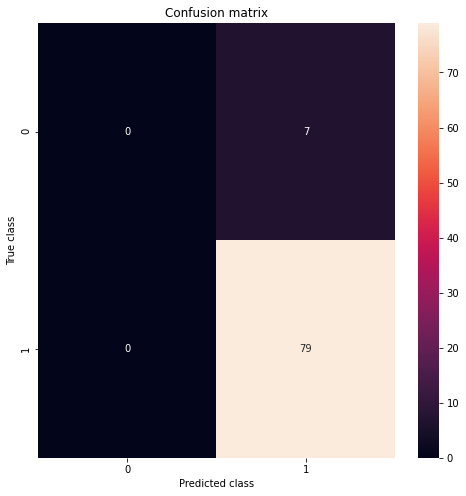

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.92      1.00      0.96        79

    accuracy                           0.92        86
   macro avg       0.46      0.50      0.48        86
weighted avg       0.84      0.92      0.88        86



In [58]:
lm = LogisticRegression()
lm.fit(X_train,y_train)
prediccion1 = lm.predict(X_test)
mostrar_resultados(y_test,prediccion1)

### Regresión logística

#### Precision
En esta regresión logística obtuvimos una precisión de un 0% cuando se trataba de estado 'Rechazada'. Obtuvimos este resultado dada la escasez de datos que corriespondieran a este estado, lo que derivó en que el algoritmo no fue capaz de aprender los datos que correspondieran a esta con los datos de entrenamiento. Por otro lado, tenemos una precisión de un 92% al tratarse de 'Aprobada', lo cual se deja ver al apreciar la cantidad de verdaderos que la regresión arrojó, que es casi la totalidad de los datos de prueba.

#### Accuracy
Esta regresión logística tiene una exactitud de un 92%, lo cual representa que el 92% de los casos totales fueron predichos correctamente, independiente de si fueran positivos o negativos. Sin embargo, este rendimiento sólo nos dio frutos para la predicción de los temas aprobados, ya que no acertó en ninguno de los casos en que se buscaba predecir los temas rechazados.

#### Recall
En este caso tuvimos un recall de un 0% al tratarse de la predicción de los 0, ya que el algoritmo no abarcó ninguno de estos datos de la manera correcta. Sin embargo, para el caso de las materias aprobadas, se tuvo un recall de un 100%, lo cual quiere decir que se abarcó la totalidad de casos.

#### F1-score
En el primer caso, obtuvimos un f1-score de 0, ya que la comparación entre el recall y la precisión es de 0, lo cual se explica de la siguiente manera: en este caso el algoritmo no pudo abarcar nada, ya que no encontró datos que coincidieran con lo que el consideró datos de 'Rechazada', por lo cual no hubo ni datos correctos ni datos incorrectos. En el 2do caso consideró el 100% de los datos, sin embargo, se filtraron 7 falsos positivos, los cuales hicieron que la precisión del modelo bajara, y por tanto, el promedio entre la precisión y el recall, teniendo así un 96% de datos a abarcar idealmente.

* Tuvimos 0 casos en los cuales se predijo que se iba a rechazar la sesión, lo cual constituye los verdaderos negativo.
* Tuvimos 7 casos en los cuales la regresión predijo que se iba a rechazar el tema en discusión, sin embargo, estos fueron aprobados, estos vendrían a ser los falsos negativos.
* Tuvimos 0 casos en los que se predijo que no se iba a aprobar una sesión, pero no se dio este resultado, quedando aprobadas de todas formas, estos casos son falsos positivos.
* Por último, obtuvimos 79 casos de verdaderos positivos, en los cuales no se rechazó el tema en discusión, y por tanto, fue aprobado.

# DecisionTreeClassifier

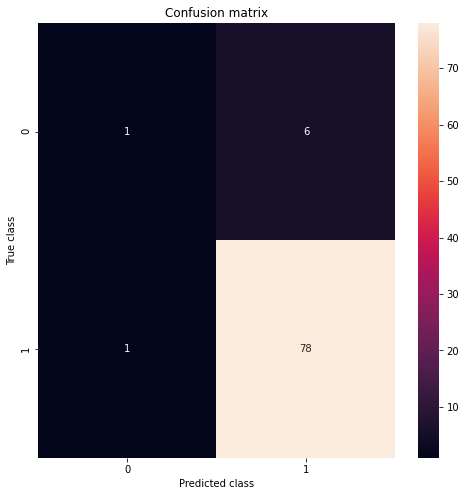

              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.93      0.99      0.96        79

    accuracy                           0.92        86
   macro avg       0.71      0.57      0.59        86
weighted avg       0.89      0.92      0.90        86



In [59]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,y_train)
prediccion2 = Dtree.predict(X_test)
mostrar_resultados(y_test,prediccion2)

### Árbol de decisión

#### Precision
En este algoritmo obtuvimos una precisión de un 50% cuando se trataba de estado 'Rechazada'. Lo cual da cuenta que este modelo tuvo una leve mejora con respecto al anterior, pero no considerable dada la falta de datos de este estado. Por otro lado, tenemos una precisión de un 93% al tratarse de 'Aprobada', lo cual se deja ver al apreciar la cantidad de verdaderos que la regresión arrojó, que es casi la totalidad de los datos de prueba.

#### Accuracy
Este algortimo una exactitud de un 92%, lo cual representa que el 92% de los casos totales fueron predichos correctamente, independiente de si fueran positivos o negativos. Sin embargo, este rendimiento sólo nos rindió casi en su totalidad para la predicción de los temas aprobados, ya que se acertó en solo 1 de los casos en que se buscaba predecir los temas rechazados.

#### Recall
En este caso tuvimos un recall de un 14% al tratarse de la predicción de los 0, teniendo así, un aumento en la cantidad de los datos abarcados de este caso. Sin embargo, para el caso de las materias aprobadas, se tuvo un recall de un 99%, lo cual quiere decir que se abarcó casi la totalidad de casos.

#### F1-score
En el primer caso, obtuvimos un f1-score de 22%, ya que la comparación entre el recall y la precisión dio como división este valor, lo cual se explica de la siguiente manera: dentro de este 14% correspondiente al recall, solo el 22% son los datos correspondientes a esta clase, y por lo tanto, datos objetivo para ser analizados. En el 2do caso consideró el 99% de los datos, sin embargo, se filtraron 6 falsos positivos, los cuales hicieron que la precisión del modelo bajara, y por tanto, el promedio entre la precisión y el recall, teniendo así un 96% de datos a abarcar idealmente.

* Tuvimos 1 caso en el cual se predijo que se iba a rechazar la sesión y así fue, lo cual constituye los verdaderos negativos.
* Tuvimos 6 casos en los cuales la regresión predijo que se iba a rechazar el tema en discusión, sin embargo, estos fueron aprobados, estos vendrían a ser los falsos negativos.
* Tuvimos 1 caso en el que se predijo que no se iba a aprobar una sesión, pero no se dio este resultado, quedando aprobadas de todas formas, estos casos son falsos positivos.
* Por último, obtuvimos 78 casos de verdaderos positivos, en los cuales no se rechazó el tema en discusión, y por tanto, fue aprobado.

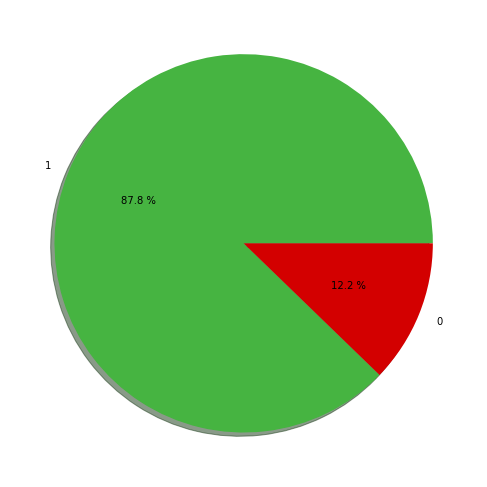

In [60]:
a = y_train == True 
b = y_train == False 
a.sum()
b.sum()
Totales = [a.sum(),b.sum()]
Tipo = ['1','0']
colores = ["#46B441","#D30000"]
plt.pie(Totales,labels=Tipo,autopct="%0.1f %%",colors=colores,shadow=True)
plt.show()

In [91]:
LRtrain = lm.score(X_train,y_train)
LRtest = lm.score(X_test,y_test)
print('Resultado train: ',round(LRtrain,4),'Resultado Test: ',round(LRtest,4))

Resultado train:  0.8805 Resultado Test:  0.9186


In [85]:
DRtrain = Dtree.score(X_train,y_train)
DRtest = Dtree.score(X_test,y_test)
print('Resultado train: ',round(DRtrain,4),'Resultado Test: ',round(DRtest,4))

Resultado train:  0.8863 Resultado Test:  0.9186


# ¿Hubo o no Overfitting? ¿Por qué?.

Luego de reivsar los resultados del algoritmo y comparar los porcentajes de error entre los datos de entrenamiento y los datos de prueba, llegamos a la conclusión de que no se presenta overfitting, aunque sí se nos presentó underfitting, ya que el algoritmo aprende en muchas iteraciones sólo cuando el estado de la sesión es 'Aprobada', quedándonos así con insuficientes datos referentes a 'Rechazada' para enseñarle al algoritmo. Esto lo hace incapaz de reconocer nuevos datos de entrada de este tipo, por lo que la mayoría de las veces en las que se presenta una sesión con estado 'Rechazado', el algoritmo la interpreta como 'Aprobado' de manera errónea, ya que sólo conoce prácticamente un tipo de estado, que en este caso sería el 'Aprobado'.

Otro de los motivos que nos llevó a concluir que estábamos en presencia de underfitting en vez de overfitting es que nuestro modelo si es representativo con la realidad que se tiene que enfrentar luego el algoritmo, ya que, como se comprueba en el gráfico anterior, existe un porcentaje parecido de cantidad de datos 'Aprobada' en realación a los de 'Rechazada'. Además, haciendo pruebas con ambos set de datos, el de entrenamiento como el de pruebas, nos dieron resultados parecidos, por lo que no se presenta una de las condiciones de del overfitting, que es que con los datos de testing se tiene menor porcentaje de error que con los de prueba, en nuestro caso fueron bastante parecidos los resultados.

## Conclusión 1

# Regresión Logística Vs Árbol de Decisión

Para este caso consideramos que es mejor el modelo de Regresión logística, ya que a pesar de que nos entrega una una la misma exactitud al relación a la de Árbol de decisión, si tenemos mayor precisión en la predicción del arbol de decisión. En adición a esto, se presentaron menores fallas registradas en este modelo versus el modelo de regresión logística.

Por otro lado, podemos concluir que al realizar la limpieza de los datos, pudimos manejarlos con una mayor exactitud. A su vez, se pudieron transformar estos datos que estaban en variables categóricas en variables numéricas con las que pudimos llevar a cabo tanto el modelo de regresión logística como el árbol de decisión. 

Luego de transformar y procesar todos los datos, pasando estos por sus respectivos algoritmos de clasificación, podemos estimar que existe un porcentaje muy alto de que los próximos temas a tratar en el parlamento sean aprobados. Esto se puede ver con más precisión al constatar que pese a haber distintos quorum requeridos, sigue siendo la tónica que las sesiones sean en su mayoría aprobadas.

# Sintonización de parámetros

### 1.- NearestCentroid

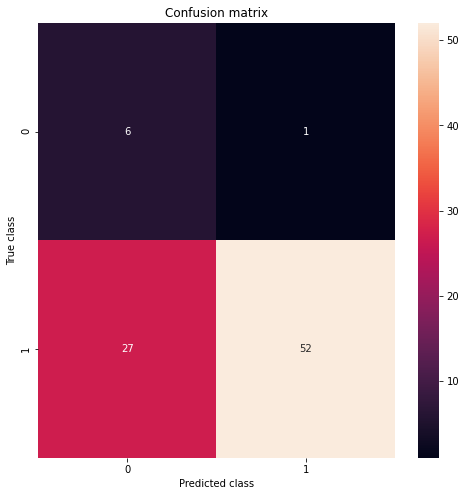

              precision    recall  f1-score   support

           0       0.18      0.86      0.30         7
           1       0.98      0.66      0.79        79

    accuracy                           0.67        86
   macro avg       0.58      0.76      0.54        86
weighted avg       0.92      0.67      0.75        86



In [61]:
clf = NearestCentroid()
clf.fit(X_train,y_train)
prediccion3 = clf.predict(X_test)
mostrar_resultados(y_test,prediccion3)

### NearestCentroid 

#### Precision
En este algoritmo obtuvimos una precisión de un 18% cuando se trataba de estado 'Rechazada'. Lo cual da cuenta que este modelo tuvo un leve empeoramiento con respecto al anterior, aunque aún sigue siendo acorde a la falta de datos de este estado. Por otro lado, tenemos una precisión de un 98% al tratarse de 'Aprobada', lo cual se deja ver al apreciar la cantidad de verdaderos que la regresión arrojó, que es casi la totalidad de los datos de prueba.

#### Accuracy
Este algoritmo tiene una exactitud de un 67%, lo cual representa que el 67% de los casos totales fueron predichos correctamente, independiente de si fueran positivos o negativos. Esta baja de rendimiento se explica con al reducción del recall, en donde crece la precisión, pero se reduce la exactitud del modelo.

#### Recall
En este caso tuvimos un recall de un 86% al tratarse de la predicción de los 0, teniendo así, un aumento considerable en la cantidad de los datos abarcados de este caso. Sin embargo, para el caso de las materias aprobadas, se tuvo un recall de un 66%, lo cual quiere decir que se abarcaron menos datos que en los modelos anteriores, lo que explica el alza de la precisión y la baja del accuracy.

#### F1-score
En el primer caso, obtuvimos un f1-score de 30%, ya que la comparación entre el recall y la precisión dio como división este valor, lo cual se explica de la siguiente manera: dentro de este 56% correspondiente al recall, solo el 26% son los datos correspondientes a esta clase, y por lo tanto, datos objetivo para ser analizados. En el 2do caso consideró el 56% de los datos, sin embargo, se filtraron muchos falsos positivos y negativos, los cuales hicieron que la precisión del modelo bajara, y por tanto, el promedio entre la precisión y el recall, teniendo así un 79% de datos a abarcar idealmente.

* Tuvimos 5 caso en el cual se predijo que se iba a rechazar la sesión y así fue, lo cual constituye los verdaderos positivos.
* Tuvimos 4 casos en los cuales la regresión predijo que se iba a rechazar el tema en discusión, sin embargo, estos fueron aprobados, estos vendrían a ser los falsos negativos.
* Tuvimos 24 casos en los que se predijo que no se iba a aprobar una sesión, pero no se dio este resultado, quedando aprobadas de todas formas, estos casos son falsos positivos.
* Por último, obtuvimos 53 casos de verdaderos negativos, en los cuales no se rechazó el tema en discusión, y por tanto, fue aprobado.

### 1.1 Sintonización de NearestCentroid

Ingresamos los parámetros a utilizar en un diccionario de datos.

In [62]:
rango_shrink_threshold = [0.0, 0.1 ,0.2 ,0.3 ,0.4 ,0.5 ,0.6 ,0.7 ,0.8 ,0.9]
rango_metric = ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis',
               'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming',
               'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 
               'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 
               'wminkowski', 'nan_euclidean', 'haversine']
param_grid = dict( shrink_threshold=rango_shrink_threshold,metric=rango_metric)
param_grid

{'shrink_threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'metric': ['euclidean',
  'l2',
  'l1',
  'manhattan',
  'cityblock',
  'braycurtis',
  'canberra',
  'chebyshev',
  'correlation',
  'cosine',
  'dice',
  'hamming',
  'jaccard',
  'kulsinski',
  'mahalanobis',
  'matching',
  'minkowski',
  'rogerstanimoto',
  'russellrao',
  'seuclidean',
  'sokalmichener',
  'sokalsneath',
  'sqeuclidean',
  'yule',
  'wminkowski',
  'nan_euclidean',
  'haversine']}

Se lleva a cabo el cross-validation, con 10 folds, y otorgándole un 25% de los datos del test. También se busca incrementar el accuracy.

In [63]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=342)
gridNC = GridSearchCV(NearestCentroid(), param_grid=param_grid, cv=cv, scoring='accuracy', refit = True)

In [64]:
gridNC

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=342, test_size=0.25,
            train_size=None),
             estimator=NearestCentroid(),
             param_grid={'metric': ['euclidean', 'l2', 'l1', 'manhattan',
                                    'cityblock', 'braycurtis', 'canberra',
                                    'chebyshev', 'correlation', 'cosine',
                                    'dice', 'hamming', 'jaccard', 'kulsinski',
                                    'mahalanobis', 'matching', 'minkowski',
                                    'rogerstanimoto', 'russellrao',
                                    'seuclidean', 'sokalmichener',
                                    'sokalsneath', 'sqeuclidean', 'yule',
                                    'wminkowski', 'nan_euclidean',
                                    'haversine'],
                         'shrink_threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                              0.7, 0.8, 0

Se entrena el grid con los datos de entrenamiento, lo cual nos otorga el rendimiento con estos datos.

In [65]:
gridNC.fit(X_train,y_train)
print("El mejor paremetro es %s con un score de %0.2f" % (gridNC.best_params_, gridNC.best_score_))

El mejor paremetro es {'metric': 'mahalanobis', 'shrink_threshold': 0.8} con un score de 0.87


Al realizar la sintonización de parámetros, se puede apreciar que aumentó el rendimiento del algoritmo aproximadamente un 24.86%.

In [66]:
NCentroid = gridNC.score(X_test,y_test)*100
print(NCentroid,'%')

91.86046511627907 %


Antes de la sintonización

In [141]:
clf.score(X_test,y_test)

0.6589147286821705

### 2.- DecisionTreeClassifier

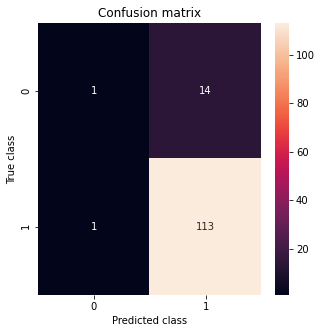

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        15
           1       0.89      0.99      0.94       114

    accuracy                           0.88       129
   macro avg       0.69      0.53      0.53       129
weighted avg       0.84      0.88      0.84       129



In [140]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,y_train)
prediccion2 = Dtree.predict(X_test)
mostrar_resultados(y_test,prediccion2)

### Árbol de decisión

#### Precision
En este algoritmo obtuvimos una precisión de un 50% cuando se trataba de estado 'Rechazada'. Lo cual da cuenta que este modelo tuvo una leve mejora con respecto al anterior, pero no considerable dada la falta de datos de este estado. Por otro lado, tenemos una precisión de un 93% al tratarse de 'Aprobada', lo cual se deja ver al apreciar la cantidad de verdaderos que la regresión arrojó, que es casi la totalidad de los datos de prueba.

#### Accuracy
Este algoritmo se tiene una exactitud de un 92%, lo cual representa que el 92% de los casos totales fueron predichos correctamente, independiente de si fueran positivos o negativos. Sin embargo, este rendimiento sólo nos rindió casi en su totalidad para la predicción de los temas aprobados, ya que se acertó en solo 1 de los casos en que se buscaba predecir los temas rechazados.

#### Recall
En este caso tuvimos un recall de un 14% al tratarse de la predicción de los 0, teniendo así, un aumento en la cantidad de los datos abarcados de este caso. Sin embargo, para el caso de las materias aprobadas, se tuvo un recall de un 99%, lo cual quiere decir que se abarcó casi la totalidad de casos.

#### F1-score
En el primer caso, obtuvimos un f1-score de 22%, ya que la comparación entre el recall y la precisión dio como división este valor, lo cual se explica de la siguiente manera: dentro de este 14% correspondiente al recall, solo el 22% son los datos correspondientes a esta clase, y por lo tanto, datos objetivo para ser analizados. En el 2do caso consideró el 99% de los datos, sin embargo, se filtraron 6 falsos positivos, los cuales hicieron que la precisión del modelo bajara, y por tanto, el promedio entre la precisión y el recall, teniendo así un 96% de datos a abarcar idealmente.

* Tuvimos 1 caso en el cual se predijo que se iba a rechazar la sesión y así fue, lo cual constituye los verdaderos positivos.
* Tuvimos 6 casos en los cuales la regresión predijo que se iba a rechazar el tema en discusión, sin embargo, estos fueron aprobados, estos vendrían a ser los falsos negativos.
* Tuvimos 1 caso en el que se predijo que no se iba a aprobar una sesión, pero no se dio este resultado, quedando aprobadas de todas formas, estos casos son falsos positivos.
* Por último, obtuvimos 78 casos de verdaderos negativos, en los cuales no se rechazó el tema en discusión, y por tanto, fue aprobado.

### 2.1 Sintonización de DecisionTreeClassifier

Se crea el diccionario de datos con los parámetros escogidos para el algoritmo de árbol de decisión.

In [68]:
rango_splitter = ['best', 'random']
rango_max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]      
rango_max_features = ['auto', 'sqrt']
rango_criterio = ['gini','entropy']
param_grid = dict(criterion=rango_criterio, max_features = rango_max_features, splitter = rango_splitter,max_depth = rango_max_depth)
param_grid

{'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt'],
 'splitter': ['best', 'random'],
 'max_depth': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19]}

Se realiza el cross-validation, con 10 folds, correspondientes al 25% de los datos de testeo.

In [69]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=113)
gridDT = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv, scoring='accuracy', refit = True)

In [70]:
gridDT

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=113, test_size=0.25,
            train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

Se entrena el modelo, obteniendo un rendimiento de un 87%, ademas los mejores parametros detectados fueron:'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'.

In [71]:
gridDT.fit(X_train,y_train)
print("El mejor paremetro es %s con un score de %0.2f" % (gridDT.best_params_, gridDT.best_score_))

El mejor paremetro es {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'splitter': 'random'} con un score de 0.87


Como se aprecia en el resultado, el rendimiento mejoró aproximadamente un 2% respecto al algoritmo sin sintonización.

In [72]:
DT = gridDT.score(X_test,y_test)*100
print(round(DT,5),'%')


90.69767 %


Antes de Sintonización

In [138]:
Dtree.score(X_test,y_test)

0.8914728682170543

### 3.- LogisticRegression

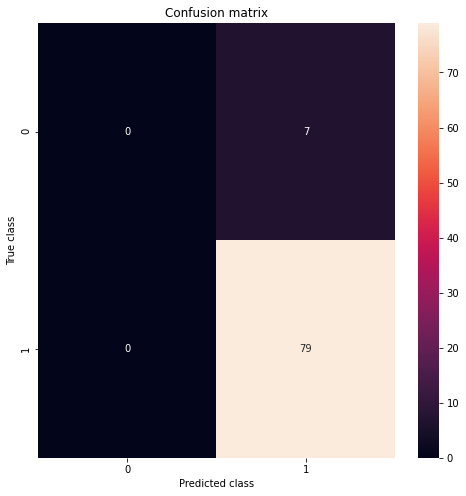

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.92      1.00      0.96        79

    accuracy                           0.92        86
   macro avg       0.46      0.50      0.48        86
weighted avg       0.84      0.92      0.88        86



In [74]:
lm = LogisticRegression()
lm.fit(X_train,y_train)
prediccion1 = lm.predict(X_test)
mostrar_resultados(y_test,prediccion1)

### Regresión logística

#### Precision
En esta regresión logística obtuvimos una precisión de un 0% cuando se trataba de estado 'Rechazada'. Obtuvimos este resultado dada la escasez de datos que corriespondieran a este estado, lo que derivó en que el algoritmo no fue capaz de aprender los datos que correspondieran a esta con los datos de entrenamiento. Por otro lado, tenemos una precisión de un 92% al tratarse de 'Aprobada', lo cual se deja ver al apreciar la cantidad de verdaderos que la regresión arrojó, que es casi la totalidad de los datos de prueba.

#### Accuracy
Esta regresión logística tiene una exactitud de un 92%, lo cual representa que el 92% de los casos totales fueron predichos correctamente, independiente de si fueran positivos o negativos. Sin embargo, este rendimiento sólo nos dio frutos para la predicción de los temas aprobados, ya que no acertó en ninguno de los casos en que se buscaba predecir los temas rechazados.

#### Recall
En este caso tuvimos un recall de un 0% al tratarse de la predicción de los 0, ya que el algoritmo no abarcó ninguno de estos datos de la manera correcta. Sin embargo, para el caso de las materias aprobadas, se tuvo un recall de un 100%, lo cual quiere decir que se abarcó la totalidad de casos.

#### F1-score
En el primer caso, obtuvimos un f1-score de 0, ya que la comparación entre el recall y la precisión es de 0, lo cual se explica de la siguiente manera: en este caso el algoritmo no pudo abarcar nada, ya que no encontró datos que coincidieran con lo que el consideró datos de 'Rechazada', por lo cual no hubo ni datos correctos ni datos incorrectos. En el 2do caso consideró el 100% de los datos, sin embargo, se filtraron 7 falsos positivos, los cuales hicieron que la precisión del modelo bajara, y por tanto, el promedio entre la precisión y el recall, teniendo así un 96% de datos a abarcar idealmente.

* Tuvimos 0 casos en los cuales se predijo que se iba a rechazar la sesión, lo cual constituye los verdaderos negativos.
* Tuvimos 7 casos en los cuales la regresión predijo que se iba a rechazar el tema en discusión, sin embargo, estos fueron aprobados, estos vendrían a ser los falsos negativos.
* Tuvimos 0 casos en los que se predijo que no se iba a aprobar una sesión, pero no se dio este resultado, quedando aprobadas de todas formas, estos casos son falsos positivos.
* Por último, obtuvimos 79 casos de verdaderos positivos, en los cuales no se rechazó el tema en discusión, y por tanto, fue aprobado.

### 3.1 Sintonización de LogisticRegression

Se crea el diccionario de datos, con los parámetros escogidos para realizar la sintonización.

In [75]:
rango_penalty = ['l1','l2','elasticnet']
rango_solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid = dict(penalty=rango_penalty , solver=rango_solver)
param_grid

{'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

Se lleva a cabo la validación cruzada, otorgándole 10 folds, pertenecientes a un 25% de los datos de prueba.

In [76]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=342)
gridLR = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=cv, scoring='accuracy', refit = True)

In [77]:
gridLR

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=342, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

Se entrena la sintonización de los parametros en busca de una mejora de rendimiento. Así mismo, el porcentaje obtenido fue de un 87% los mejores parametros fueron :'dual': False, 'penalty': 'l1', 'solver': 'liblinear'. 

In [78]:
gridLR.fit(X_train,y_train)
print("El mejor paremetro es %s con un score de %0.2f" % (gridLR.best_params_, gridLR.best_score_))

El mejor paremetro es {'penalty': 'l1', 'solver': 'liblinear'} con un score de 0.87


Finalme el algoritmo mejoró aproximadamente un 1% con respecto al algoritmo sin sintonización de parametros

In [79]:
LR = gridLR.score(X_test,y_test)*100
print(round(LR,3),'%')

93.023 %


Antes de la sintonización

In [142]:
lm.score(X_test,y_test)

0.8837209302325582

### Comparación de rendimiento entre los distintos algoritmos

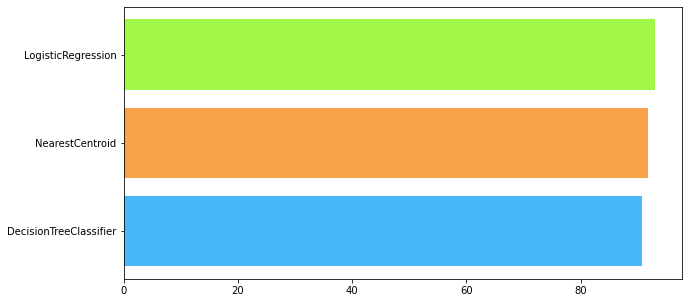

In [82]:
plt.figure(figsize=(10,5))
ejeX = ['DecisionTreeClassifier','NearestCentroid','LogisticRegression']
ejeY = [DT,NCentroid,LR]
plt.barh(ejeX,ejeY,color=["#48B7F7","#F7A248","#A0F748"])
plt.show()

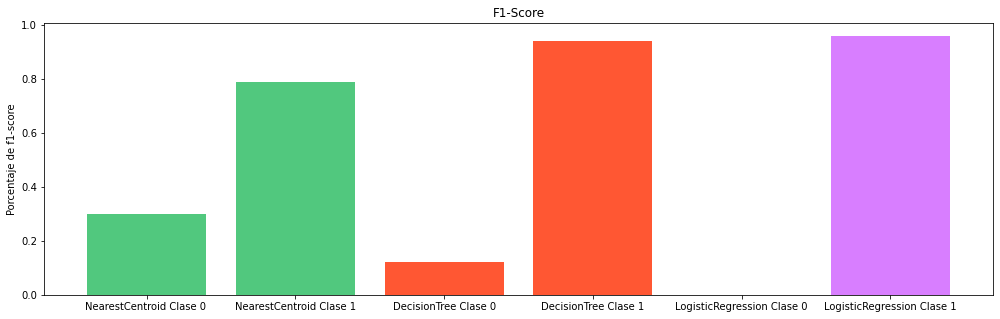

In [168]:
f1Centro0 = 0.30 
f1Centro1 = 0.79 
f1Arbol0 = 0.12 
f1Arbol1 = 0.94
f1Logist0 = 0.0
f1Logist1 = 0.96
plt.figure(figsize=(17,5))
ejeX = ['NearestCentroid Clase 0 ','NearestCentroid Clase 1','DecisionTree Clase 0','DecisionTree Clase 1','LogisticRegression Clase 0','LogisticRegression Clase 1']
ejeY = [f1Centro0,f1Centro1,f1Arbol0,f1Arbol1,f1Logist0,f1Logist1]
plt.bar(ejeX,ejeY,color=["#51C87E","#51C87E","#FF5733","#FF5733","#D87EFF","#D87EFF"])
plt.title('F1-Score')
plt.ylabel('Porcentaje de f1-score')
plt.show()


## Conclusiones del gráfico

Todos los algoritmos mejoraron el rendimiento con la sintonización de parámetros. Por otro lado, el algoritmo de DecisionTreeClassifier se posicionó último entre todos los algoritmos, no necesariamente teniendo un desempeño peor que antes, pero sí un desempeño más bajo que el de los demás algoritmos. Sin embargo, entre todos estos algoritmos el que mejor desempeño tuvo fue el regresión logística, pero este algoritmo tiene muy malas medidas f1-score, es por esto que decidimos quedarnos con NearestCentroid  ya que tiene las mejores medidas f1-score, además gracias a la sintonización de parámetros logro acortar distancias en cuanto a su rendimiento en relación a sus competidores, es por esto que de quedándonos con este como el mejor de todos.

# 4.- 5 Pruebas de configuración del training y testing set. 

## NearestCentroid como mejor algoritmo

### 80% test 20% train

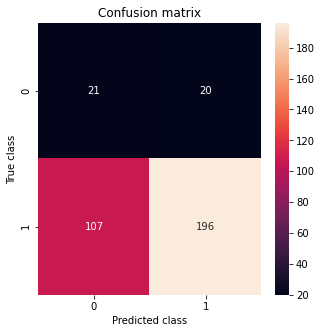

              precision    recall  f1-score   support

           0       0.16      0.51      0.25        41
           1       0.91      0.65      0.76       303

    accuracy                           0.63       344
   macro avg       0.54      0.58      0.50       344
weighted avg       0.82      0.63      0.69       344

Resultado train:  77.64999999999999 % Resultado Test:  63.080000000000005 %


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8, random_state = 11)
clf1 = NearestCentroid()
clf1.fit(X_train,y_train)
prediccionConf1 = clf1.predict(X_test)
mostrar_resultados(y_test,prediccionConf1)
#Over?
CtrTrain1 = clf1.score(X_train,y_train)
CtrTest1 = clf1.score(X_test,y_test)
print('Resultado train: ',round(CtrTrain1,4)*100,'%','Resultado Test: ',round(CtrTest1,4)*100,'%')

In [145]:
Conf1 = clf1.score(X_test,y_test)
Conf1 = round(Conf1,3)
Conf1 #80% test 20% train

0.631

#### Precision
En esta configuración obtuvimos una precisión de un 16% cuando se trataba de estado 'Rechazada'. Obtuvimos este resultado dada la escasez de datos que corriespondieran a este estado, Por otro lado, tenemos una precisión de un 91% al tratarse de 'Aprobada', lo cual se deja ver al apreciar la cantidad de verdaderos que la regresión arrojó, que corresponde a una gran parte de los datos de prueba.

#### Accuracy
Esta configuración tiene una exactitud de un 63%, lo cual representa que el 63% de los casos totales fueron predichos correctamente, independiente de si fueran positivos o negativos. 

#### Recall
En este caso tuvimos un recall de un 51% al tratarse de la predicción de los 0. Sin embargo, para el caso de las materias aprobadas, se tuvo un recall de un 65%.

#### F1-score
En el primer caso, obtuvimos un f1-score de 25%, lo cual se explica de la siguiente manera: hubo un 25% de datos a abarcar, En el 2do caso consideró el 76% de los datos, teniendo así un 76% de datos objetivo a abarcar idealmente.

### 40% test 60% train

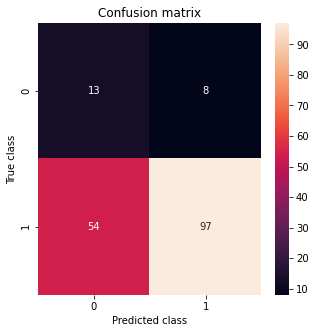

              precision    recall  f1-score   support

           0       0.19      0.62      0.30        21
           1       0.92      0.64      0.76       151

    accuracy                           0.64       172
   macro avg       0.56      0.63      0.53       172
weighted avg       0.83      0.64      0.70       172

Resultado train:  68.08999999999999 % Resultado Test:  63.949999999999996 %


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 11)
clf2 = NearestCentroid()
clf2.fit(X_train,y_train)
prediccionConf2 = clf2.predict(X_test)
mostrar_resultados(y_test,prediccionConf2)
#Over?
CtrTrain2 = clf2.score(X_train,y_train)
CtrTest2 = clf2.score(X_test,y_test)
print('Resultado train: ',round(CtrTrain2,4)*100,'%','Resultado Test: ',round(CtrTest2,4)*100,'%')

In [148]:
Conf2 = clf2.score(X_test,y_test)
Conf2 = round(Conf2,3)
Conf2 #40% test 60% train

0.64

# Precision
En esta configuración obtuvimos una precisión de un 19% cuando se trataba de estado 'Rechazada'. Por otro lado, tenemos una precisión de un 92% al tratarse de 'Aprobada', lo cual se deja ver al apreciar la cantidad de verdaderos que la regresión arrojó.

#### Accuracy
Esta configuración tiene una exactitud de un 64%, lo cual representa que el 64% de los casos totales fueron predichos correctamente, independiente de si fueran positivos o negativos.

#### Recall
En este caso tuvimos un recall de un 62% al tratarse de la predicción de los 0. Sin embargo, para el caso de las materias aprobadas, se tuvo un recall de un 64%, lo cual quiere decir que se abarcó una gran cantidad de los casos.

#### F1-score
En el primer caso, obtuvimos un f1-score de 30%, lo cual se explica de la siguiente manera: hubo un 30% de datos a abarcar, y de estos datos hubo un 30% de ellos que fue objetivo para clasificar esta variable. En el 2do caso consideró el 76% de los datos, teniendo así un 76% de datos objetivo a abarcar idealmente.


### 90% test 10% train

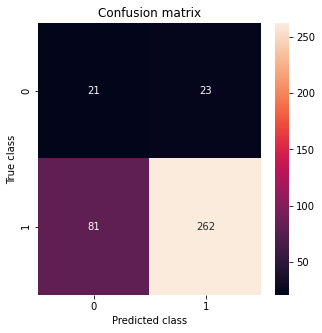

              precision    recall  f1-score   support

           0       0.21      0.48      0.29        44
           1       0.92      0.76      0.83       343

    accuracy                           0.73       387
   macro avg       0.56      0.62      0.56       387
weighted avg       0.84      0.73      0.77       387

Resultado train:  76.19 % Resultado Test:  73.13 %


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.9, random_state = 11)
clf3 = NearestCentroid()
clf3.fit(X_train,y_train)
prediccionConf3 = clf3.predict(X_test)
mostrar_resultados(y_test,prediccionConf3)
#Over?
CtrTrain3 = clf3.score(X_train,y_train)
CtrTest3 = clf3.score(X_test,y_test)
print('Resultado train: ',round(CtrTrain3,4)*100,'%','Resultado Test: ',round(CtrTest3,4)*100,'%')

In [150]:
Conf3 = clf3.score(X_test,y_test)
Conf3 = round(Conf3,2)
Conf3 #90% test 10% train

0.73

#### Precision
En esta configuración obtuvimos una precisión de un 21% cuando se trataba de estado 'Rechazada'. Por otro lado, tenemos una precisión de un 92% al tratarse de 'Aprobada', ero aumentó levemente respecto de las configuraciónes anteriores.

#### Accuracy
Esta configuración tiene una exactitud de un 73%, lo cual representa que el 73% de los casos totales fueron predichos correctamente, independiente de si fueran positivos o negativos. 

#### Recall
En este caso tuvimos un recall de un 48% al tratarse de la predicción de los 0. Sin embargo, para el caso de las materias aprobadas, se tuvo un recall de un 76%, lo cual quiere decir que se abarcó una gran cantidad de los casos.

#### F1-score
En el primer caso, obtuvimos un f1-score de 29%, lo cual se explica de la siguiente manera: hubo un 29% de datos a abarcar, y de estos datos hubo un 29% de ellos que fue objetivo para clasificar esta variable. En el 2do caso consideró el 83% de los datos, teniendo de estos, un 83% de datos objetivo a abarcar idealmente.

### 70% test 30% train

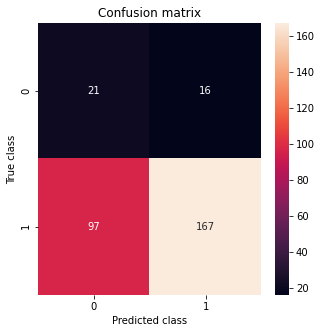

              precision    recall  f1-score   support

           0       0.18      0.57      0.27        37
           1       0.91      0.63      0.75       264

    accuracy                           0.62       301
   macro avg       0.55      0.60      0.51       301
weighted avg       0.82      0.62      0.69       301

Resultado train:  67.97 % Resultado Test:  62.46000000000001 %


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.7, random_state = 11)
clf4 = NearestCentroid()
clf4.fit(X_train,y_train)
prediccionConf4 = clf4.predict(X_test)
mostrar_resultados(y_test,prediccionConf4)
#Over?
CtrTrain4 = clf4.score(X_train,y_train)
CtrTest4 = clf4.score(X_test,y_test)
print('Resultado train: ',round(CtrTrain4,4)*100,'%','Resultado Test: ',round(CtrTest4,4)*100,'%')

In [153]:
Conf4 = clf4.score(X_test,y_test)
Conf4 = round(Conf4,2)
Conf4 #70% test 30% train

0.62

#### Precision
En esta configuración obtuvimos una precisión de un 18% cuando se trataba de estado 'Rechazada'. Por otro lado, tenemos una precisión de un 91% al tratarse de 'Aprobada', pero disminuyó levemente respecto de la configuración anterior.

#### Accuracy
Esta configuración tiene una exactitud de un 62%, lo cual representa que el 62% de los casos totales fueron predichos correctamente, independiente de si fueran positivos o negativos. Esto representa una disminución de la exactitud en el modelo.

#### Recall
En este caso tuvimos un recall de un 57% al tratarse de la predicción de los 0. Sin embargo, para el caso de las materias aprobadas, se tuvo un recall de un 63%, lo cual quiere decir que se abarcó una gran parte de los casos.

#### F1-score
En el primer caso, obtuvimos un f1-score de 27%, lo cual se explica de la siguiente manera: hubo un 27% de datos a abarcar. En el 2do caso consideró el 75% de los datos, teniendo de estos, un 75% de datos objetivo a abarcar idealmente.

### 30% test 70% train

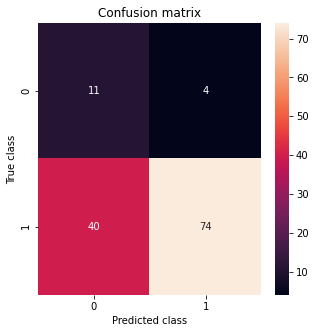

              precision    recall  f1-score   support

           0       0.22      0.73      0.33        15
           1       0.95      0.65      0.77       114

    accuracy                           0.66       129
   macro avg       0.58      0.69      0.55       129
weighted avg       0.86      0.66      0.72       129

Resultado train:  71.0 % Resultado Test:  65.89 %


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 11)
clf5 = NearestCentroid()
clf5.fit(X_train,y_train)
prediccionConf5 = clf5.predict(X_test)
mostrar_resultados(y_test,prediccionConf5)
#Over?
CtrTrain5 = clf5.score(X_train,y_train)
CtrTest5 = clf5.score(X_test,y_test)
print('Resultado train: ',round(CtrTrain5,4)*100,'%','Resultado Test: ',round(CtrTest5,4)*100,'%')

In [155]:
Conf5 = clf5.score(X_test,y_test)
Conf5 = round(Conf5,2)
Conf5 #30% test 70% train

0.66

#### Precision
En esta configuración obtuvimos una precisión de un 22% cuando se trataba de estado 'Rechazada'. Por otro lado, tenemos una precisión de un 95% al tratarse de 'Aprobada', lo cual se deja ver al apreciar la cantidad de verdaderos que la regresión arrojó, que corresponde a una gran parte de los datos de prueba.

#### Accuracy
Esta configuración tiene una exactitud de un 66%, lo cual representa que el 66% de los casos totales fueron predichos correctamente, independiente de si fueran positivos o negativos. Esto representa un aumento de la exactitud en el modelo.

#### Recall
En este caso tuvimos un recall de un 73% al tratarse de la predicción de los 0. Sin embargo, para el caso de las materias aprobadas, se tuvo un recall de un 63%, lo cual quiere decir que se una gran cantidad de los casos.

#### F1-score
En el primer caso, obtuvimos un f1-score de 33%, lo cual se explica de la siguiente manera: hubo un 33% de datos a abarcar, en el 2do caso consideró el 77% de los datos, teniendo de estos, un 77% de datos objetivo a abarcar idealmente.

### ¿Como fueron variando los resultados?

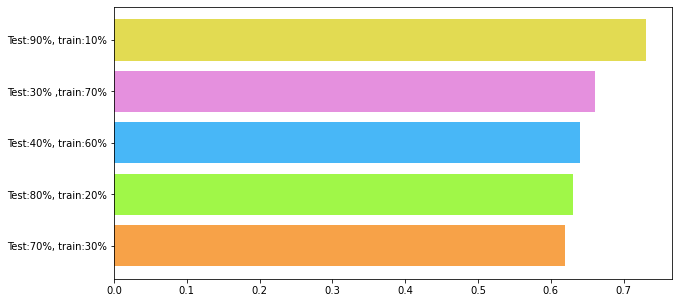

In [159]:
plt.figure(figsize=(10,5))
ejeX = ['Test:70%, train:30%','Test:80%, train:20%','Test:40%, train:60%','Test:30% ,train:70%','Test:90%, train:10%']
ejeY = [Conf4,Conf1,Conf2,Conf5,Conf3]
plt.barh(ejeX,ejeY,color=["#F7A248","#A0F748","#48B7F7","#E590DE","#E2DB52"])
plt.show()